In [1]:
import pandas as pd
import numpy as np

In [2]:
def softmax(z):
    t=np.exp(z- np.max(z))
    return(t/(np.sum(t,axis=0))) # axis=0 sum column wise

In [3]:
def relu(z):
    return(np.maximum(z,0.0001))

In [4]:
def model():
    w1=np.random.rand(50,784)*np.sqrt(2/784)#50 784
    b1=np.full((50,1),0.001)
    w2=np.random.rand(25,50)*np.sqrt(2/50) #25 50
    b2=np.full((25,1),0.001)
    w3=np.random.rand(10,25)*np.sqrt(2/25)#10 25
    b3=np.full((10,1),0.001)
    parameters={"w1":w1,"w2":w2,"w3":w3,"b1":b1,"b2":b2,"b3":b3}
    return(parameters)

In [5]:
def forward(parameters,x_train):
    z1=(np.matmul(parameters["w1"],x_train)+parameters["b1"]) #50 100
    a1=relu(z1)
    z2=(np.matmul(parameters["w2"],a1)+parameters["b2"]) #25 100
    a2=relu(z2)
    z3=(np.matmul(parameters["w3"],a2)+parameters["b3"]) #10 100
    a3=softmax(z3)                                        #10 100
    cache={"z1":z1,"z2":z2,"z3":z3,"a1":a1,"a2":a2,"a3":a3}
    return(cache)

In [41]:
def cost(a,y_train,lambd,weight_sum,batch_size):
    cost=-(np.sum(np.multiply(y_train,np.log(a)))/batch_size+(lambd/(2*batch_size))*weight_sum)/batch_size
    return(cost)

In [28]:
def backward(x_train,y_train,parameters,cache,learning_rate,lambd,batch_size): 
    dz3=cache["a3"]-y_train #(10x100) 
    dw3=np.matmul(dz3,cache["a2"].T) #(10x25)
    db3=dz3
    
    dz2=np.matmul(parameters["w3"].T,dz3)
    dw2=np.matmul(dz2,cache["a1"].T) #25 50
    db2=dz2 
    
    dz1=np.matmul(np.matmul(parameters["w3"],parameters["w2"]).T,dz3)
    dw1=np.matmul(dz1,x_train.T) #50 784
    db1=dz1       
    
    cache2={"dw1":dw1/batch_size,"dw2":dw2/batch_size,"dw3":dw3/batch_size,"db1":db1/batch_size,"db2":db2/batch_size,"db3":db3/batch_size}
    for i in range(3):
        parameters["w"+str(i+1)]=parameters["w"+str(i+1)]-(learning_rate*(cache2["dw"+str(i+1)]+(lambd/batch_size)))#*parameters["w"+str(i+1)]))
        parameters["b"+str(i+1)]=parameters["b"+str(i+1)]-(learning_rate*cache2["db"+str(i+1)])
    
    return(parameters)

In [44]:
def train(x_train,y_train,batch_size):
    parameters=model()
    for j in range(1000):
        for i in range(0,20000,batch_size):
            cache=forward(parameters,x_train[:,i:i+batch_size])
            weight_sum=np.sum(parameters["w3"])+np.sum(parameters["w2"])+np.sum(parameters["w1"])
            print(cost(cache["a3"],y_train[:,i:i+batch_size],0.8,weight_sum,batch_size))
            parameters=backward(x_train[:,i:i+batch_size],y_train[:,i:i+batch_size],parameters,cache,0.2,0.8,batch_size)
    return parameters        

x_train.shape,y_train.shape
(784, 42000) (10, 42000)

In [9]:
df=pd.read_csv("MNIST dataset/train.csv")

In [10]:
X=np.array(df)
x_train,y_train=X[:,1:],X[:,0]

In [11]:
y_train=y_train.reshape((42000,1))
x_train=(x_train.T)/256
y_train=y_train.T+np.zeros((10,42000))
m=y_train[1]
print(x_train.shape,y_train.shape)

(784, 42000) (10, 42000)


In [12]:
y_train[:,6]
y_train1=np.zeros([10,42000])
for i in range(42000):
    k=int(y_train[0][i])
    y_train1[k][i]=1
y_train=y_train1

In [13]:
x_train/=256 #Preprocessing dataset

In [ ]:
parameters=train(x_train,y_train,100)

-0.0229577086097
-0.0203378431105
-0.017731300332
-0.015113930068
-0.0125435271958
-0.00992058455886
-0.00728536695457
-0.00471597106839
-0.00207173618548
0.000529572418448
0.00312058070731
0.0057241289961
0.0083279236123
0.0109396852109
0.0135330469862
0.0161433921309
0.0187417623972
0.0213477182394
0.0239526428965
0.0265634429224
0.0291622201817
0.0317699397622
0.034372427032
0.0369765065023
0.0395856081975
0.0421887278616
0.0447914552065
0.0473961058344
0.0500022779106
0.0526116541708
0.0552151611637
0.0578172898124
0.0604177728162
0.0630226817524
0.0656342665004
0.0682458373523
0.0708416134837
0.0734452646642
0.0760512045018
0.0786546421539
0.081262725309
0.0838653744187
0.0864684029922
0.0890795194943
0.0916812594752
0.0942794429866
0.0968884784637
0.0994928280761
0.10209904223
0.104704966358
0.107306657867
0.109913101238
0.112508416002
0.115119747739
0.117725464204
0.120335452894
0.122941195807
0.125541626705
0.128146950087
0.13074988648
0.133357108449
0.135952472701
0.1385710769

1.60031655688
1.60296954854
1.60553113629
1.60818249631
1.61075401931
1.61332669593
1.61597909693
1.61857230077
1.62118540398
1.62375537749
1.62639859163
1.62901951502
1.63165688866
1.63422336733
1.63677669026
1.63936996571
1.64198663369
1.64464979081
1.647249327
1.64979052814
1.65241747043
1.65508630978
1.65762257378
1.66024309731
1.66287048483
1.66550673397
1.6680779371
1.67069011122
1.67326860421
1.67589826231
1.6784903557
1.68109023142
1.68372770012
1.68632376022
1.68897983622
1.69154110404
1.69415642725
1.69674472882
1.69931261835
1.70197794464
1.70459016396
1.70718985119
1.70974222165
1.71241780049
1.71496249519
1.71764485722
1.7201972646
1.72283323636
1.725365848
1.72803618685
1.73061491263
1.7332740642
1.73588259945
1.73854350434
1.7411527306
1.7437028203
1.74636405324
1.74892204982
1.7515371167
1.75417310685
1.75673166678
1.7593190175
1.76194755511
1.76454459211
1.76718850708
1.7698262637
1.77235176556
1.77496290809
1.77759177417
1.78020049288
1.78279364131
1.78537653056
1.787

3.15955724424
3.16216533983
3.16476285012
3.16745764807
3.16998286781
3.17267705055
3.17521823483
3.17776103934
3.18045209207
3.1830326151
3.18565644693
3.18820014765
3.19087567994
3.19350344333
3.19616474434
3.19870212071
3.20121294594
3.20379303356
3.20641793854
3.20913186726
3.21172723866
3.21421467178
3.2168553438
3.21958343227
3.22206628998
3.22469573605
3.22734385096
3.23000597686
3.23254751961
3.2351692618
3.2377220501
3.2403805014
3.24295591088
3.24555009998
3.24821203384
3.25079905645
3.25350433884
3.25602715269
3.25865495317
3.2612240263
3.26376705556
3.26647455069
3.2690927225
3.27169233074
3.27420761559
3.27693817198
3.27943229718
3.28217670451
3.28469278465
3.2873524889
3.28982260018
3.29254563201
3.29511009311
3.29781790486
3.30043023231
3.3031279834
3.30574722417
3.30824996118
3.31095391144
3.3134761574
3.31609581823
3.31876239722
3.32127967938
3.32385920841
3.32650346284
3.32909322349
3.331776972
3.33443562969
3.33690028082
3.33952099543
3.34215916657
3.34477423912
3.34

4.79779934268
4.80042991693
4.80295960179
4.80564159007
4.80820203395
4.81079087145
4.81347348703
4.81605197688
4.81880064141
4.82128927474
4.82392917073
4.8264790046
4.82899960179
4.83174376488
4.83436654259
4.83696868925
4.83945170417
4.84223100986
4.84467857823
4.84747845155
4.84996306813
4.85264292574
4.85505617567
4.8578264798
4.86037882059
4.86313083192
4.86574564874
4.86847721913
4.87110424477
4.87356458943
4.87630554888
4.87879391204
4.88141744013
4.88411098391
4.88659220875
4.88916324559
4.89182136168
4.89440351364
4.8971225367
4.89980018869
4.90220972851
4.90483880564
4.90748469203
4.91010464816
4.91268345058
4.91523788517
4.9178702817
4.92050979982
4.92309974702
4.92569296849
4.92840792112
4.93089973843
4.93345863789
4.93612508275
4.93866472744
4.94125660177
4.94380370026
4.94644289588
4.94906866074
4.95176946733
4.95430279188
4.95682709899
4.95944038731
4.96212923553
4.96474941206
4.9673536857
4.96990003186
4.97263602621
4.97528339177
4.97778854426
4.98041088442
4.982988947

6.49653146878
6.49907651727
6.50175846739
6.50427855176
6.50686347074
6.50939589523
6.51203448568
6.51466288359
6.51738987211
6.51990420991
6.52240673988
6.52502124334
6.52772901706
6.53035468728
6.53295805633
6.53549045683
6.53825912214
6.54091184359
6.54338885555
6.5460132003
6.54858583485
6.55116353835
6.55371562388
6.55624811004
6.55904982299
6.56159396948
6.56428038927
6.56686299759
6.56981963513
6.57225507107
6.57473463303
6.57724206779
6.58005875858
6.58241947823
6.58510102598
6.58780544791
6.59009569305
6.59301541627
6.59556694584
6.59830930727
6.60074280693
6.60331172225
6.60600858273
6.60853996614
6.61121211964
6.61383770816
6.61652133326
6.61899060136
6.62183935876
6.62443833469
6.62697263789
6.62959741921
6.63204714277
6.63473884908
6.6375887296
6.63986450412
6.64256584785
6.64530550225
6.64781651535
6.65058290842
6.65304713052
6.65581471686
6.65833682351
6.66094736584
6.66364133462
6.66609656048
6.66870221466
6.6711864854
6.67390648824
6.67656618433
6.67919540102
6.6816237

8.04128262021
8.04384409351
8.04637256128
8.04901395066
8.05167068598
8.05425144947
8.05683198658
8.05958479728
8.06202099512
8.06455409398
8.0672481853
8.06974929923
8.07232640329
8.07484449707
8.07747975618
8.08010885849
8.08285926853
8.08535493023
8.08783728028
8.09045227455
8.09317563159
8.09580639219
8.09840789202
8.10092853282
8.10372647966
8.10638092024
8.10883069762
8.11145647367
8.11402395791
8.11659338096
8.11913574941
8.12165529895
8.12448694096
8.12702187818
8.12972324664
8.132300841
8.13531601626
8.13772071583
8.14017721376
8.14266539087
8.14551540321
8.14782923159
8.15052267617
8.15324237899
8.15548129187
8.15845609453
8.16099884043
8.16376450427
8.16616882379
8.16872950319
8.17143897752
8.17395707207
8.17664307883
8.17927472981
8.18197579555
8.18441962853
8.18730550291
8.18990708215
8.19243157896
8.19505620187
8.19747672175
8.20017870593
8.20307160504
8.2052911269
8.20800876558
8.21076740542
8.21325768279
8.21604817881
8.21848834853
8.22128284252
8.22379120096
8.22639984

9.78613680242
9.78863290665
9.7912386879
9.79396693018
9.79635645529
9.79895449475
9.80140573876
9.8041542788
9.80682839017
9.80947016283
9.81183828546
9.81477445256
9.81735909022
9.81999515027
9.82252681715
9.82517913757
9.8277971756
9.83028004469
9.83286196649
9.8354608779
9.83816449637
9.84090091498
9.84360730992
9.84592028754
9.8488301584
9.85125406363
9.85391188374
9.85660246313
9.8593850073
9.86171467742
9.86436006193
9.86727697098
9.86956003448
9.87245734317
9.87493429574
9.87741508471
9.88002406267
9.88294524009
9.88565198457
9.88783679106
9.89061153779
9.89316336195
9.89578432517
9.89840848144
9.90117293234
9.90360339199
9.90611388949
9.90904305425
9.91160729013
9.91390673047
9.91652409979
9.91919796681
9.92164715359
9.92414036806
9.92696308983
9.92923407749
9.9321274871
9.93458000684
9.93725914235
9.93980223276
9.9425185495
9.94512261735
9.94770393801
9.95054699301
9.95295690863
9.95578042076
9.9582173894
9.96064825335
9.96345600963
9.96596913862
9.96862100603
9.97108333793
9

11.3318926895
11.3340173656
11.3367608064
11.3395463965
11.3419962035
11.3448228451
11.3472227533
11.3500622791
11.3525473569
11.3551495342
11.3578933131
11.3602509914
11.362844215
11.3652827723
11.3680412571
11.3707202598
11.3733688147
11.3757102172
11.3786754773
11.3812539576
11.3838970845
11.3864215955
11.3890797243
11.3916942934
11.3941628329
11.3967394874
11.3993390089
11.4020502876
11.4047980041
11.4075118204
11.4097989521
11.4127377771
11.4151401069
11.4178096447
11.4204998008
11.4232979235
11.425596721
11.4282479175
11.4311960889
11.4334494711
11.4363789573
11.438838427
11.4413062635
11.4439131229
11.4468687735
11.449582708
11.4517281312
11.4545207578
11.4570642194
11.4596858477
11.4623095958
11.4650898361
11.4675014838
11.4699946488
11.4729539112
11.4755090288
11.4777708975
11.480381393
11.4830553296
11.4854866274
11.4879614818
11.4908092935
11.4930431662
11.4959662797
11.498399239
11.5010842198
11.5036151937
11.5063437112
11.5089439115
11.5115211483
11.5143922936
11.516782713

12.8708114457
12.8735608899
12.875938717
12.8789068385
12.8815155024
12.8840238363
12.8866373842
12.8889809121
12.891699625
12.8946989167
12.8967840204
12.8995376923
12.9023321651
12.9047625864
12.9076023295
12.9099859538
12.912844207
12.9153191501
12.9179173573
12.9206756292
12.9230023543
12.9255902429
12.9280181791
12.9307844344
12.9334671724
12.9361229045
12.9384396807
12.9414299693
12.9440019282
12.9466525822
12.9491706789
12.9518346304
12.9544448072
12.9568999369
12.9594711084
12.9620716654
12.964789253
12.9675467009
12.9702663171
12.9725312351
12.975495463
12.9778777441
12.9805594635
12.9832467293
12.9860585556
12.9883289212
12.9909857202
12.99396218
12.9961894464
12.9991486555
13.0015910155
13.0040474543
13.006652028
13.0096386726
13.0123583416
13.0144686942
13.0172774338
13.0198127412
13.0224349463
13.025057822
13.0278522422
13.0302469709
13.0327224141
13.0357080408
13.0382536145
13.0404801298
13.0430823566
13.0457545615
13.0481695093
13.0506261582
13.0534969553
13.0556969718
1

14.443041792
14.4455480401
14.4481550335
14.4504762869
14.4531972658
14.4562261106
14.4582760103
14.4610386929
14.4638399527
14.4662515873
14.4691018302
14.4714712743
14.4743464204
14.4768120362
14.479406057
14.4821783223
14.4844752019
14.4870574123
14.4894766579
14.4922487321
14.4949343459
14.4975980243
14.499892322
14.5029043407
14.5054697281
14.5081286019
14.5106409407
14.5133111498
14.5159160741
14.518358794
14.5209245098
14.5235264889
14.5262493909
14.5290155294
14.5317397583
14.5339857323
14.5369723373
14.5393360914
14.5420304672
14.5447129206
14.5475370546
14.5497814213
14.5524438152
14.5554456158
14.5576503403
14.560637326
14.563063147
14.565509844
14.5681120037
14.5711266285
14.5738508781
14.5759300781
14.5787535455
14.5812809135
14.5839039993
14.5865260064
14.5893333507
14.5917130452
14.5941706191
14.5971794819
14.5997154934
14.6019089331
14.6045020406
14.6071710456
14.6095712592
14.6120099184
14.6149020036
14.6170711751
14.6200453873
14.6224424898
14.6251369204
14.6276424618

16.0240684011
16.0264620158
16.0293206868
16.0316780525
16.0345685241
16.0370255251
16.0396152767
16.0424013448
16.0446695937
16.0472457371
16.0496582446
16.0524345667
16.055122459
16.0577949584
16.0600687427
16.063099909
16.065658885
16.0683267285
16.070834022
16.0735108672
16.076110133
16.0785415212
16.0811020109
16.0837060121
16.0864333543
16.0892075347
16.0919355107
16.0941654611
16.0971721029
16.0995186891
16.1022261008
16.1049023125
16.107737821
16.1099584838
16.1126265114
16.1156513211
16.1178366796
16.1208497197
16.1232595733
16.1256982552
16.1282978977
16.1313376033
16.1340658988
16.1361171411
16.1389542472
16.141474178
16.1440984829
16.1467198054
16.1495392233
16.1519057059
16.1543455375
16.1573749129
16.1599015999
16.1620640321
16.1646475011
16.167312427
16.1696994529
16.172120474
16.1750321919
16.1771729571
16.1801698364
16.1825508879
16.1852493309
16.1877419593
16.1905012654
16.1930878259
16.1956524163
16.1985985503
16.2009435095
16.2038336343
16.2062027558
16.2085457707
1

17.5802350432
17.5830450843
17.5854213584
17.5882867823
17.5906336716
17.5935382586
17.5959872957
17.5985726125
17.601372147
17.6036127126
17.6061825781
17.6085898842
17.611369064
17.6140588544
17.6167408196
17.6189958902
17.6220438555
17.624596461
17.627273836
17.6297766283
17.6324604113
17.6350537143
17.637474588
17.6400301872
17.6426364098
17.6453674624
17.6481489895
17.650880068
17.6530962444
17.6561213968
17.6584518542
17.6611727067
17.6638415529
17.6666874137
17.6688862988
17.6715599129
17.6746056082
17.6767744756
17.6798119781
17.6822065325
17.6846384245
17.687235449
17.6902978247
17.6930294342
17.695055644
17.697905441
17.7004184737
17.7030441088
17.7056648732
17.7084956284
17.7108504599
17.7132725338
17.7163202704
17.718837515
17.7209707747
17.7235440834
17.7262041437
17.728579194
17.7309829457
17.7339127916
17.7360276438
17.7390454448
17.7414117097
17.7441138042
17.7465933339
17.7493614788
17.7519433787
17.7545038954
17.7574727324
17.7598064071
17.7627085099
17.7650637621
17.

19.2189141367
19.2215747394
19.2244303296
19.2266091495
19.2292884777
19.2323530725
19.2345082914
19.2375688411
19.2399487318
19.2423750219
19.2449696767
19.2480523593
19.2507866866
19.2527902674
19.2556520175
19.2581588558
19.2607861815
19.2634066186
19.2662480699
19.2685927131
19.270997191
19.2740614541
19.276569221
19.2786752443
19.2812380756
19.2838928617
19.2862570139
19.2886440035
19.2915905986
19.2936818149
19.2967193286
19.2990717482
19.3017771481
19.3042436779
19.3070201295
19.3095975806
19.3121542011
19.3151447169
19.3174687484
19.3203817164
19.3227241477
19.3250284778
19.3279127564
19.3303209038
19.3329845034
19.3354006418
19.3381541037
19.340778716
19.3435099912
19.3458059297
19.3480689314
19.3505022731
19.3530785399
19.3561371433
19.3586523461
19.360798332
19.3635171008
19.3665937123
19.3687870546
19.3714243058
19.3741526822
19.3769461153
19.3793093666
19.3819938809
19.3843908186
19.3871244299
19.3895867464
19.3921262091
19.3948961709
19.3974076653
19.4003739075
19.4026851

20.8815445808
20.884436716
20.8868280882
20.8894935352
20.8919080367
20.8946564955
20.897277843
20.9000070307
20.9022847492
20.9045365488
20.9069563412
20.9095213616
20.9126026702
20.9151105191
20.917238629
20.9199619124
20.9230577382
20.9252385838
20.9278732928
20.9306029663
20.9334026638
20.9357563315
20.9384449711
20.940833409
20.9435637935
20.9460177944
20.9485532219
20.951328619
20.9538355488
20.9568143667
20.9591178085
20.961860749
20.9642153312
20.9665861139
20.9695064324
20.972125777
20.974832435
20.9771512242
20.9801992244
20.9823249059
20.985435764
20.9877658045
20.9905152671
20.9925452083
20.9956096505
20.9981145277
21.001143134
21.0037406891
21.0067095855
21.0093394849
21.0115316523
21.0144395382
21.0166520397
21.0193015974
21.02212655
21.0244183757
21.0268893623
21.0296271268
21.0321140783
21.035031149
21.0378215125
21.0398770008
21.0425472612
21.0452080228
21.0478350125
21.0503114592
21.0527596813
21.055417463
21.0581077076
21.0606624808
21.0631806503
21.0659580833
21.068

22.562126721
22.5647540197
22.5669306366
22.5698434633
22.5720370852
22.5746897204
22.5775201928
22.5798057512
22.5822684517
22.5850131018
22.5874930358
22.5904193822
22.5932166939
22.5952521262
22.5979255817
22.600585666
22.6032126463
22.6056801449
22.6081212152
22.6107804154
22.613472652
22.6160275708
22.6185393767
22.6213116983
22.6235479167
22.6260219174
22.6287433414
22.6310985712
22.6335829548
22.635991965
22.638518687
22.6410981527
22.6440093495
22.6463472566
22.6487120612
22.6513279846
22.6540965352
22.656766622
22.6593264612
22.6617976479
22.6647800924
22.6673595506
22.6696125545
22.6722403157
22.6747716759
22.6772723224
22.6797295786
22.6821787639
22.6851211315
22.6876516303
22.6904420718
22.692969007
22.6962995364
22.6985156645
22.7008281496
22.7032028278
22.706202286
22.708203358
22.7109560472
22.7137378433
22.7157127623
22.7189895027
22.7214861354
22.7243711315
22.7266275858
22.7291231844
22.7318675451
22.7343313353
22.7371273594
22.7398061016
22.742651598
22.744933693
22.

24.1419157235
24.1448505411
24.1476545246
24.1496714751
24.1523482115
24.1550075984
24.1576345567
24.1600933367
24.1625279669
24.1651883698
24.1678826985
24.1704380788
24.1729439216
24.1757101896
24.1779293288
24.1804010799
24.183121288
24.1854643431
24.187938464
24.1903380921
24.1928489814
24.1954203678
24.1983461608
24.2006696474
24.2030285921
24.2056451892
24.208414225
24.2110886929
24.2136424963
24.2161126577
24.2191101831
24.2216773828
24.2239160399
24.2265434102
24.2290721414
24.2315672683
24.2340154417
24.23646319
24.2394079373
24.2419443286
24.2447408868
24.2472638086
24.2506144244
24.252817671
24.2551204449
24.2574885058
24.2604950368
24.2624713199
24.2652283886
24.2680129871
24.2699725517
24.2732685622
24.275763685
24.2786552976
24.2809059187
24.283396134
24.2861411808
24.2886040476
24.2914117836
24.294095462
24.2969560685
24.2992258818
24.3022869284
24.3049159671
24.30743229
24.309981131
24.3121891538
24.3149071941
24.3180863681
24.3199837489
24.3227859268
24.3256031868
24.3

25.7725737448
25.7751282313
25.7773535848
25.779980357
25.7825067352
25.7849967184
25.7874357099
25.7898829535
25.7928292855
25.7953725145
25.7981746368
25.8006939087
25.8040630548
25.8062545098
25.8085483058
25.8109101969
25.8139231573
25.8158758714
25.8186368977
25.8214239156
25.8233697063
25.8266837211
25.8291775313
25.8320752763
25.8343214619
25.8368063427
25.8395520543
25.8420145634
25.8448338913
25.8475227564
25.8503983369
25.8526563772
25.8557248678
25.858357601
25.8608776593
25.8634157224
25.8656089896
25.8683254081
25.8715240523
25.8734045829
25.8762116992
25.8790294828
25.8813242844
25.8842077374
25.8865216339
25.8894840171
25.8918959262
25.8944577196
25.8973280479
25.8994345374
25.9019706169
25.904368727
25.9071490579
25.9098471016
25.9125909294
25.9147676558
25.9178793925
25.9204024213
25.9231378564
25.9256248747
25.9283498929
25.9309058886
25.9332861357
25.9358161404
25.9384399014
25.9411822708
25.9439996605
25.9467424469
25.9489207054
25.952021349
25.954282561
25.95707858

27.317217489
27.3197583112
27.322228139
27.3252552522
27.3277967757
27.3300097503
27.3326355928
27.3351600778
27.3376451897
27.3400748794
27.3425223337
27.3454697665
27.3480203968
27.3508277391
27.3533436328
27.3567298712
27.3589105248
27.3611958205
27.3635521306
27.3665710217
27.3685011264
27.3712658137
27.3740550458
27.3759882623
27.3793193048
27.3818120278
27.3847154897
27.3869581669
27.3894379928
27.3921843198
27.3946470085
27.397477965
27.4001721784
27.4030625795
27.4053093261
27.4083845902
27.4110212109
27.4135455354
27.4160724203
27.4182514727
27.4209663217
27.4241835262
27.426048541
27.4288607558
27.4316783808
27.4339596574
27.4368442632
27.4391554149
27.4421261241
27.4445316272
27.4470889813
27.4499724976
27.4520561824
27.454585629
27.4569851269
27.4597637374
27.4624629792
27.4652199861
27.4673849287
27.4705054688
27.4730241643
27.475771364
27.4782568305
27.4809894397
27.4835382115
27.485913438
27.4884387498
27.4910667657
27.4938098158
27.4966341949
27.4993786375
27.5015547864

28.9836155734
28.9858835364
28.9887689734
28.9910780253
28.9940564585
28.9964556928
28.999008746
29.0019054524
29.0039668535
29.0064898012
29.0088911707
29.0116674067
29.0143678645
29.0171383841
29.0192922881
29.0224208617
29.0249354387
29.0276947107
29.0301787814
29.032918885
29.0354604488
29.0378314346
29.040351931
29.0429843334
29.0457278025
29.0485590838
29.0513049949
29.053480396
29.0566033881
29.0588441018
29.061668709
29.064266454
29.0671788321
29.0692590849
29.0719751806
29.0751358204
29.077242049
29.0804286565
29.0827230494
29.0851351301
29.0877125756
29.0908892804
29.0936332716
29.0955339758
29.0984630534
29.1009413071
29.1035862736
29.1062050849
29.1091086761
29.1114142294
29.113712386
29.1168538744
29.1193012556
29.121265554
29.1237594618
29.1263740721
29.1286879051
29.130979166
29.1340090271
29.1359915949
29.1391350371
29.1414197245
29.1441368555
29.1465219339
29.1493441366
29.1518991906
29.1544343715
29.1575475152
29.1598355803
29.1628044683
29.16508035
29.1672795267
29.1

30.5998002963
30.6025473132
30.6047230318
30.6078564565
30.6100874497
30.6129262576
30.6155134523
30.6184338334
30.6205014559
30.6232236827
30.6263971907
30.6284993942
30.631703246
30.633985283
30.6363972121
30.6389717691
30.6421596203
30.644904134
30.6467926474
30.649731737
30.6522066799
30.6548551759
30.6574735731
30.6603865734
30.6626886557
30.6649703865
30.668121887
30.6705591224
30.6725042517
30.674986867
30.6775945524
30.6799025367
30.6821794295
30.6852198977
30.68718963
30.690347961
30.6926238702
30.6953419812
30.6977143018
30.7005427823
30.7030947808
30.7056270741
30.7087580384
30.7110431247
30.7140191089
30.7162863479
30.7184705556
30.7213999642
30.7236907421
30.726371675
30.7287997476
30.7315045948
30.7340965379
30.7368106188
30.7389831279
30.7411921371
30.7435293341
30.7460137219
30.7492186585
30.7516902984
30.7537404272
30.7564842987
30.7596832342
30.7618129113
30.7644299825
30.7671644519
30.769995772
30.7723063833
30.7750148436
30.7773579503
30.780063828
30.782464435
30.78

32.2304061679
32.2326686305
32.2357193792
32.2376768447
32.2408497145
32.2431170605
32.2458356959
32.2481952757
32.2510297731
32.2535786207
32.2561081017
32.2592567108
32.2615390789
32.2645218451
32.2667806942
32.2689501553
32.2718837477
32.2741592053
32.2768424723
32.2792749711
32.2819716338
32.2845574085
32.2872689859
32.2894262306
32.2916312203
32.2939550567
32.2964257372
32.2996480449
32.3021146618
32.3041559207
32.3069016366
32.3101146207
32.3122394742
32.3148533609
32.3175881249
32.3204234571
32.3227285352
32.3254394661
32.3277761886
32.3304775853
32.3328697345
32.3353865479
32.3381960402
32.3406812083
32.3437307535
32.3460123716
32.3488217049
32.3510563842
32.353378386
32.3563358616
32.3589449953
32.3617609571
32.3640614226
32.3671918378
32.3691959488
32.3723926332
32.3746995396
32.3774452727
32.3793354566
32.3825235061
32.3850394474
32.3881750309
32.3907772251
32.3938588148
32.3964678488
32.39856973
32.4014923704
32.4035886783
32.4062633422
32.4091188529
32.4113916195
32.413804

33.8751330629
33.877463702
33.8801602294
33.8825440072
33.8850589885
33.887872341
33.890355496
33.8934125694
33.8956936008
33.8985116294
33.9007306398
33.9030474117
33.9060076227
33.908615635
33.9114470005
33.9137471889
33.9168869337
33.9188771576
33.9220823242
33.9243878224
33.927132721
33.9290072861
33.9322098329
33.9347279627
33.9378763772
33.9404800986
33.9435751696
33.9461810011
33.9482735096
33.9511951131
33.9532783923
33.9559563994
33.9588144618
33.9610882333
33.9634936511
33.9662953954
33.9687340577
33.9717050278
33.9745472981
33.9764720933
33.9791713253
33.9818256321
33.9844541526
33.98686128
33.9892629878
33.9919285149
33.9946315038
33.9971979413
33.9996720418
34.0023826679
34.0045049095
34.0069749594
34.0096792336
34.0119555153
34.0143647474
34.0167069111
34.0191141748
34.0216287329
34.0246411364
34.026882508
34.029220021
34.031841426
34.0346084899
34.0373137647
34.0398228677
34.0422960219
34.0453846258
34.0478660458
34.0500329063
34.0526539607
34.0551699994
34.0576359267
34

35.4087860914
35.4109029435
35.4135100009
35.4162452876
35.4190880077
35.4213827764
35.4240982345
35.4264229794
35.4291143783
35.4314898284
35.4340028876
35.4368200988
35.4393011913
35.4423654971
35.4446462781
35.447472824
35.4496761584
35.4519878604
35.4549502922
35.4575570836
35.4604041275
35.4627042957
35.465853154
35.4678296872
35.4710429623
35.4733471673
35.4760911593
35.4779506827
35.4811673144
35.483687645
35.4868485789
35.4894539848
35.4925621907
35.4951645525
35.4972481844
35.5001683954
35.5022390515
35.5049202208
35.5077806054
35.5100559575
35.5124533466
35.5152632689
35.517696999
35.5206714274
35.5235193311
35.5254317486
35.5281348456
35.5307879359
35.5334170465
35.5358156619
35.5382130925
35.5408785197
35.5435821411
35.5461512437
35.5486203513
35.5513201588
35.5534280529
35.5558994255
35.5586002215
35.5608670791
35.5632656191
35.565598858
35.5679892839
35.570494287
35.5735194361
35.5757488196
35.5780841747
35.5807060709
35.5834723105
35.5861826454
35.5886841898
35.591158569

36.9797103493
36.9822216137
36.9850426232
36.987521622
36.9905929691
36.9928737466
36.9957087291
36.9978964491
37.0002033116
37.0031676275
37.0057730663
37.0086358753
37.0109364332
37.0140939958
37.0160572719
37.0192783119
37.021581344
37.0243244743
37.0261695224
37.0293998811
37.0319225051
37.0350957129
37.0377029864
37.0408239828
37.0434227739
37.0454979828
37.0484164872
37.0504749322
37.0531591731
37.0560217128
37.0582990247
37.0606884466
37.0635066608
37.0659355449
37.0689131072
37.0717664601
37.0736670408
37.0763740206
37.0790259045
37.0816555311
37.0840457005
37.0864389825
37.089104178
37.0918082525
37.0943801975
37.0968444116
37.0995330217
37.1016267871
37.1040998994
37.1067969646
37.1090546638
37.1114424867
37.1137668075
37.1161403659
37.11863579
37.1216734457
37.1238911278
37.1262245662
37.1288468586
37.1316122968
37.1343277757
37.1368214823
37.1392973112
37.1424133231
37.1448651924
37.1470135437
37.1496312423
37.1521437823
37.1546012195
37.1569699329
37.1594344262
37.16237296

38.7097676914
38.712381248
38.7152166658
38.7177151336
38.7211930942
38.7233161056
38.7255451773
38.727870684
38.7309194853
38.7326989725
38.7354835115
38.7382834486
38.7401536465
38.7435824522
38.7460763225
38.7490053665
38.7512418435
38.7536882823
38.756437995
38.7589099455
38.7618220209
38.7645581067
38.7675539599
38.7697204378
38.7728349567
38.7754988549
38.7780647178
38.7805008369
38.7825829994
38.7852838037
38.7886181158
38.7903974194
38.7932397924
38.7960481704
38.7982375617
38.8011187056
38.803423705
38.806441166
38.8088021168
38.8113249728
38.8143046948
38.8162289491
38.8187129455
38.8211338505
38.8238829189
38.8265901792
38.8294475087
38.8315392716
38.834705537
38.8371942776
38.8400324201
38.8425079785
38.8452891013
38.8477842729
38.8501345993
38.8526219145
38.8552853092
38.8580202476
38.8608943642
38.8636454121
38.8658347462
38.8690176081
38.8711989881
38.8741135909
38.876644514
38.8796019373
38.8816075216
38.8843604215
38.8875978433
38.8896851553
38.8929727483
38.8951925301

40.331979628
40.3353281487
40.3370983285
40.3399442955
40.3427504051
40.3449285526
40.3478080771
40.3501132575
40.3531359029
40.3554908267
40.3580086407
40.3610015544
40.3629048431
40.3653826651
40.3678080444
40.3705512903
40.3732596737
40.3761307857
40.3782135771
40.3813844972
40.3838694607
40.3867204022
40.3891944155
40.3919813852
40.3944694108
40.3968174881
40.3992994225
40.4019679768
40.404700444
40.4075815645
40.4103329708
40.4125266496
40.4157176519
40.4178905973
40.4208191773
40.423339668
40.426303364
40.4282982395
40.4310567682
40.4343055914
40.4363909178
40.4396932975
40.4419017288
40.4443165501
40.4468720927
40.4501188808
40.4528592419
40.4546837737
40.4576848101
40.4601401666
40.4628106106
40.4654233282
40.4683952913
40.4706810983
40.4728623342
40.4760655497
40.4784337087
40.4802682276
40.4826762522
40.4852379093
40.48751331
40.4897010594
40.4928000429
40.4947001146
40.497944657
40.5001718894
40.5028901861
40.5051810768
40.5080455758
40.5105784137
40.513094025
40.5163331563


41.8887507164
41.8909178156
41.893795508
41.8961010388
41.8991286057
41.901477623
41.9039903066
41.9069962356
41.9088788101
41.9113503867
41.9137804194
41.9165175819
41.9192270837
41.9221120012
41.9241859484
41.9273611699
41.9298422903
41.932706048
41.9351785397
41.9379711069
41.9404519971
41.942797981
41.945274452
41.9479481246
41.9506779171
41.9535660226
41.9563176827
41.9585161295
41.961715138
41.9638796988
41.966822138
41.969332218
41.9723019569
41.9742863475
41.9770504738
41.9803105239
41.9823941367
41.9857109304
41.9879080738
41.990323696
41.9928760488
41.9961307398
41.9988700407
42.0006856526
42.0036962815
42.0061488437
42.0088228544
42.0114341578
42.0144152156
42.0166992
42.0188651991
42.0220753129
42.0244321549
42.0262503909
42.028646346
42.0312005893
42.0334713198
42.0356452126
42.0387523945
42.040642683
42.0438998374
42.0461204169
42.0488379842
42.0511163326
42.0539863273
42.0565160154
42.059029279
42.0622848501
42.0645561121
42.0675753763
42.069786261
42.0718692128
42.07482

43.5858795496
43.589149159
43.5913631815
43.594079978
43.5963458136
43.5992211918
43.6017476658
43.6042588183
43.6075306798
43.6098009669
43.6128250529
43.6150290707
43.6170990426
43.6200559254
43.6222180649
43.6249205168
43.6273909241
43.6300231957
43.6325552327
43.6352482199
43.6373007217
43.6394878541
43.6417154576
43.6440766681
43.6474134761
43.6498457135
43.6518406599
43.6545892446
43.6578941807
43.6599973025
43.6625842293
43.6653215189
43.6681798248
43.6704511912
43.6731770326
43.6754710374
43.6781349656
43.6804655506
43.6829694369
43.6858069082
43.688276294
43.6913771032
43.6936597138
43.6965298877
43.6986510705
43.7009396286
43.7039084198
43.7065073132
43.7094397004
43.7117438252
43.714936598
43.7168451289
43.7200985623
43.7223961409
43.7251357498
43.7269240927
43.7302094232
43.7327433969
43.7359673786
43.7385840168
43.7417576894
43.7443399624
43.7463832513
43.7492912875
43.751299343
43.7539967377
43.7568672793
43.7591565225
43.7615115606
43.7643664625
43.7667756792
43.76976303

45.1543369918
45.1573656292
45.1595629008
45.1616200565
45.1645795658
45.1667261164
45.169431451
45.1719075188
45.174530583
45.1770541513
45.1797449477
45.1817837059
45.1839693936
45.1861841185
45.1885294687
45.1918805511
45.194308407
45.1962985757
45.1990466661
45.2023631259
45.2044643722
45.2070473006
45.2097850945
45.2126457933
45.2149131582
45.2176407725
45.2199289303
45.2225877604
45.2249097481
45.2274119753
45.2302530658
45.2327201238
45.2358273737
45.2381107542
45.2409889015
45.2430947174
45.2453795378
45.2483487749
45.2509457854
45.2538945467
45.2561999424
45.2594001821
45.2612967184
45.2645570577
45.2668535494
45.2695921365
45.2713681848
45.2746656418
45.2772022727
45.2804376435
45.2830566345
45.2862419456
45.2888199146
45.2908565459
45.2937615597
45.2957585147
45.2984587231
45.3013306796
45.3036234787
45.3059704736
45.3088337464
45.3112386716
45.3142276899
45.3171086637
45.3189525791
45.3216796623
45.3243256242
45.3269570637
45.3293025116
45.3316753207
45.3343382794
45.337041

46.8680502908
46.8706818691
46.8730189593
46.8753880008
46.8780502219
46.8807529248
46.8833445361
46.8857799351
46.8883908303
46.8903997087
46.8928892021
46.8955584538
46.897764349
46.9000827158
46.9023509922
46.9046177962
46.9070526058
46.9101631755
46.912312889
46.9146364397
46.9172589812
46.9200202281
46.9227692127
46.9252086226
46.9276963919
46.9308960773
46.9332523199
46.9353490475
46.9379522753
46.9404522582
46.9428894135
46.9451948188
46.947691473
46.9506084532
46.9532701753
46.9561213134
46.9586099122
46.9621301821
46.9642253092
46.9664195482
46.9687279286
46.9717920608
46.9734707379
46.9762630518
46.9790682905
46.9809111882
46.9843959658
46.9868938928
46.9898316464
46.9920774517
46.9945013243
46.997250996
46.9997347026
47.0027013542
47.0054690923
47.0085394409
47.0106478995
47.0137867223
47.0164715614
47.0190741042
47.0214394515
47.0234542894
47.0261435868
47.0295498902
47.0312851662
47.0341446501
47.0369387827
47.0390699255
47.0419410711
47.0442486325
47.0472912089
47.0496211

48.5219193815
48.5237582198
48.527252679
48.5297514757
48.5326903266
48.5349386588
48.5373583448
48.5401079539
48.5425939428
48.5455706187
48.5483442797
48.5514285902
48.5535258858
48.5566690571
48.5593580014
48.5619676252
48.5643194618
48.5663218321
48.5690088889
48.572427826
48.5741558122
48.577018043
48.5798089811
48.5819294945
48.5847987853
48.5871070518
48.5901537128
48.5924781129
48.5949676732
48.5980284493
48.5998235675
48.6022683558
48.6047198793
48.6074280599
48.6101424121
48.6130870555
48.6151242878
48.618315234
48.6207795524
48.6236988467
48.6261652581
48.6289795646
48.6314303889
48.6337681042
48.6362207573
48.6389162392
48.6416321712
48.6445504152
48.6473024664
48.6495255318
48.6527576731
48.6548864579
48.6578885961
48.6603534212
48.6633471102
48.6652877136
48.6680763306
48.6713836235
48.6734615582
48.6768377315
48.6789868028
48.6814063278
48.6839444337
48.6872302661
48.68996414
48.6917428165
48.6947950455
48.6972361131
48.6999262451
48.702529255
48.7055496535
48.7078267512

50.2024690819
50.2054679652
50.2073986843
50.2101929389
50.2135106388
50.2155876242
50.2189769458
50.2211151859
50.2235355899
50.2260703215
50.229362896
50.2320953341
50.2338656216
50.2369275626
50.2393660766
50.2420599854
50.2446606835
50.2476901672
50.2499658385
50.2520528671
50.2552963953
50.2575911937
50.2593258071
50.2616556054
50.2641709362
50.2664168957
50.2685177097
50.2716655992
50.2735079084
50.2768297255
50.2790164972
50.2817284991
50.2839405588
50.2868381954
50.2893501729
50.2918538134
50.2951945789
50.2974614635
50.3005043102
50.3026797339
50.3046949313
50.3076628633
50.3097565229
50.3124718016
50.3149672029
50.3175592997
50.3200524858
50.3227366792
50.3247302774
50.326912244
50.3290836447
50.3313749051
50.334772567
50.3371858603
50.3391620613
50.3419071268
50.3452610881
50.3473567655
50.3499259492
50.3526658893
50.3555343114
50.3577886128
50.3605216415
50.362790272
50.3654316002
50.367724321
50.3702217991
50.3730743751
50.3755334304
50.3786610072
50.3809472062
50.38385147

51.7913549446
51.7934274262
51.7966768259
51.7989597996
51.8006791839
51.8029961337
51.8055043585
51.8077457431
51.8098328905
51.8129880329
51.8148217977
51.818155589
51.8203361353
51.8230468438
51.8252466187
51.8281493705
51.8306578863
51.8331600715
51.8365164437
51.8387826322
51.841829509
51.843998429
51.8460013008
51.848971826
51.8510495037
51.8537678495
51.8562691403
51.8588518776
51.8613355024
51.8640178941
51.8659981476
51.868179273
51.8703376804
51.8726123706
51.8760238085
51.8784326713
51.8804052412
51.8831491746
51.8865140292
51.8886083766
51.8911733461
51.8939139357
51.8967846534
51.8990350526
51.9017697112
51.9040323935
51.9066685597
51.9089523381
51.9114484742
51.9143043751
51.9167609055
51.9198944393
51.9221815524
51.9250937046
51.9271329418
51.9294026756
51.9323711504
51.9349601441
51.9379793741
51.9402919571
51.9435226703
51.9453691367
51.9486580481
51.9509496851
51.9536830564
51.9554096298
51.9587565101
51.961304567
51.9645880279
51.9672177325
51.9704514042
51.973009519

53.472846236
53.4754332163
53.4784687202
53.4807832468
53.4840205015
53.4858559187
53.4891512414
53.4914417469
53.4941738754
53.4958896149
53.4992473991
53.5017980311
53.5050923243
53.5077245742
53.5109691037
53.5135223299
53.5155263436
53.5184116595
53.5203530714
53.5230667457
53.5259457433
53.5282603379
53.5305633494
53.5334709756
53.5358541806
53.5388488594
53.5417556744
53.5435488581
53.5462959565
53.5489365384
53.5515683745
53.5538689347
53.5562224404
53.5588802151
53.5615791797
53.5641870086
53.5666025823
53.5691547672
53.5711085541
53.5736135203
53.576261423
53.5784337551
53.5807044478
53.5829349455
53.5851277168
53.5875215732
53.5906774423
53.5927832597
53.5951033187
53.5977242387
53.6004821895
53.6032552313
53.605654697
53.6081523538
53.6114087853
53.6136973483
53.6157623468
53.6183536362
53.6208440343
53.6232693873
53.625529822
53.628053734
53.6309518441
53.6336537344
53.6365144383
53.6389957664
53.6425428932
53.6446188525
53.6467861508
53.6490809941
53.6521567865
53.65375563

55.1401293234
55.1429079994
55.1452978935
55.1477980336
55.1510675005
55.153340271
55.1553982062
55.1579867042
55.1604747866
55.1628976331
55.1651476552
55.1676780291
55.1705716029
55.1732828829
55.1761454386
55.1786252378
55.1821779301
55.184249766
55.1864111429
55.1887028946
55.1917811521
55.1933618474
55.1961578006
55.1989679241
55.2007919534
55.2043271071
55.2068283198
55.2097707224
55.2120316272
55.2144337378
55.2171824957
55.2196786882
55.2226980067
55.2254966764
55.228642118
55.2306908541
55.2338520683
55.2365593556
55.2392001764
55.2414935403
55.2434418011
55.2461193418
55.2495906224
55.2512894392
55.2541626133
55.2569391447
55.2590139153
55.2618754221
55.2641868187
55.2672503327
55.2695511583
55.272016846
55.2751308817
55.2768402825
55.2792590339
55.2817333851
55.2844092354
55.2871291041
55.2901334319
55.2921351921
55.2953392677
55.2977860632
55.3007617091
55.3032215809
55.3060546462
55.3084767569
55.3108080598
55.3132357521
55.315952673
55.3186525192
55.3216013371
55.32435249

56.7121648511
56.7150290956
56.7175074804
56.7210655918
56.7231332792
56.725288855
56.7275774918
56.7306582147
56.7322208217
56.7350171923
56.7378281885
56.739649362
56.743193685
56.7456954223
56.7486382954
56.7509025035
56.7533005958
56.7560490695
56.7585477384
56.7615767541
56.764381127
56.7675406872
56.7695782663
56.7727435053
56.7754550507
56.7781031854
56.7803829505
56.7823187165
56.7849941139
56.7884770594
56.7901698011
56.7930452437
56.795818392
56.7978826821
56.8007423355
56.8030545845
56.8061217325
56.8084173769
56.810877457
56.814003701
56.8156935352
56.818106393
56.8205861116
56.8232542956
56.8259753711
56.828993472
56.8309872568
56.8341942211
56.8366368053
56.8396255886
56.8420840077
56.8449209749
56.8473368607
56.8496668605
56.8520887519
56.8548106098
56.8575064592
56.8604624111
56.8632134122
56.8654728107
56.8687439684
56.8708292792
56.8739040017
56.8763129946
56.8793330547
56.881222016
56.8840408623
56.887403877
56.8894770297
56.8929215574
56.8950133852
56.8974378419
56.

58.2475787204
58.2503090186
58.2531749404
58.2556519723
58.2592152243
58.2612788877
58.2634287491
58.2657142906
58.2687975767
58.270342062
58.2731387954
58.2759506787
58.277769163
58.2813225078
58.2838248723
58.2867681006
58.2890357056
58.2914297679
58.2941779936
58.296679168
58.299717946
58.3025279961
58.3057015892
58.3077281062
58.3108973414
58.3136131954
58.3162686593
58.318534813
58.3204581004
58.3231313175
58.3266257887
58.3283126903
58.3311902969
58.3339601111
58.33601389
58.3388718014
58.3411848492
58.3442556554
58.3465461605
58.3490005733
58.3521390885
58.3538093726
58.3562162606
58.3587014481
58.3613618986
58.3640842722
58.3671161087
58.3691019084
58.372311817
58.3747501663
58.3777520819
58.380209088
58.3830498536
58.3854596757
58.3877883928
58.3902045505
58.3929313423
58.3956230879
58.3985862345
58.4013370265
58.4036036067
58.4068818888
58.4089592622
58.4120474661
58.4144460982
58.4174707567
58.4193502733
58.4221748091
58.4255482663
58.4276206424
58.4310777516
58.4331589364
5

59.8911895027
59.8935903262
59.8960810922
59.8987336923
59.901457451
59.9045030558
59.9064807897
59.909693685
59.9121277162
59.9151428463
59.917598392
59.9204429454
59.9228467161
59.9251743041
59.9275846674
59.9303163109
59.9330038929
59.9359743152
59.9387248536
59.9409987498
59.9442840495
59.9463535112
59.9494551609
59.9518435291
59.9548726545
59.9567428183
59.9595730222
59.9629568976
59.9650284887
59.9684981503
59.9705686967
59.9729950517
59.9755091409
59.9788413788
59.9815635416
59.9832820846
59.9864061565
59.9888282286
59.9915456713
59.9941315359
59.9972184968
59.9994850658
60.0014809628
60.0047607825
60.0069804065
60.0086207663
60.0108680168
60.0133380148
60.0155556727
60.01756986
60.0207632286
60.0225522265
60.025949332
60.0280976633
60.030799869
60.0329350809
60.0358650832
60.0383535056
60.0408493502
60.0442877764
60.0465517947
60.0496189312
60.0517535204
60.0536927622
60.0566770451
60.0586702108
60.0614054242
60.0639376822
60.0664702496
60.0689007403
60.0715748362
60.0734845597

61.4100650165
61.4129194014
61.4152339601
61.4183122514
61.4205924453
61.4230354085
61.4261985097
61.4278297134
61.4302245499
61.4327208134
61.4353655572
61.4380906517
61.4411500533
61.4431197123
61.4463354638
61.4487651566
61.4517934781
61.4542476764
61.4570959241
61.4594935339
61.4618200794
61.4642245463
61.4669609806
61.4696443216
61.4726220347
61.4753723553
61.4776536875
61.4809460174
61.4830075509
61.4861225592
61.4885007046
61.4915342897
61.4933951144
61.4962308923
61.4996252346
61.5016960705
61.5051783132
61.5072381279
61.5096654645
61.512176201
61.5155144595
61.5182349645
61.519945498
61.5230794008
61.5254988193
61.5282200061
61.5308036316
61.5338995827
61.5361645827
61.5381465587
61.5414317648
61.5436393987
61.5452651111
61.5474991872
61.5499620464
61.552175281
61.5541759948
61.5573764682
61.559157089
61.5625659797
61.5647084225
61.5674089852
61.5695320044
61.5724672528
61.5749517173
61.5774465312
61.5809002228
61.5831639692
61.5862347222
61.58836289
61.5902904656
61.593277397

62.973981159
62.9770543102
62.9790160487
62.9822345257
62.9846598573
62.9877013484
62.990154242
62.9930060322
62.9953975536
62.9977230677
63.0001216401
63.0028628257
63.0055418326
63.0085268849
63.0112769514
63.0135659094
63.0168652228
63.0189187841
63.0220471124
63.0244149595
63.0274531086
63.0293045321
63.0321459092
63.0355507358
63.0376208233
63.0411155925
63.0431646809
63.045592927
63.048100333
63.0514445952
63.0541634451
63.0558659064
63.0590096839
63.0614264694
63.0641514693
63.0667326769
63.0698376052
63.0721010596
63.074069115
63.0773597166
63.0795553878
63.0811663652
63.0833872367
63.0858431108
63.0880517927
63.0900390564
63.0932465195
63.0950187925
63.0984393629
63.1005761033
63.1032749391
63.1053857468
63.1083262435
63.1108066524
63.1133006165
63.1167694896
63.1190329193
63.1221071402
63.1242290038
63.1261450187
63.1291345528
63.1310955496
63.133837305
63.1363812189
63.1388950097
63.1413045172
63.1439765197
63.1458593749
63.1480387664
63.1501019073
63.1522521811
63.155762057

64.5595808019
64.5626234566
64.5644655005
64.5673124812
64.5707277724
64.5727971342
64.5763043491
64.5783427232
64.5807719002
64.5832759198
64.5866261996
64.5893433482
64.5910377303
64.5941913567
64.5966055059
64.5993343649
64.6019130818
64.6050269114
64.6072888156
64.6092429728
64.6125389777
64.6147226488
64.6163189391
64.6185264985
64.6209754242
64.6231795136
64.6251532685
64.6283676803
64.6301317093
64.6335638831
64.6356949568
64.6383920005
64.6404906492
64.6434363404
64.6459127231
64.6484058362
64.6518898311
64.6541530512
64.657230601
64.6593461812
64.6612506273
64.6642427732
64.6661876273
64.6689327745
64.6714825231
64.6739868803
64.6763857338
64.6790568177
64.6809262077
64.6831058245
64.6851559416
64.6872888475
64.690812115
64.6931850114
64.6951310929
64.6978631775
64.7013160975
64.7034029411
64.7059332014
64.7086803531
64.7115678308
64.7137879755
64.7165364433
64.7187485322
64.7213427975
64.7235513248
64.7260369988
64.7289209381
64.7313537529
64.7345353657
64.7368328162
64.73981

66.1051554372
66.1072241499
66.1107437225
66.1127714079
66.1152015557
66.1177021898
66.1210584067
66.1237738302
66.1254601985
66.1286236614
66.1310352037
66.1337679383
66.1363441445
66.139466853
66.1417272135
66.1436675525
66.1469688985
66.1491405402
66.1507222114
66.15291645
66.155358426
66.1575579344
66.1595181967
66.1627394961
66.1644953704
66.1679391226
66.1700645448
66.1727597578
66.1748462876
66.1777971391
66.1802695029
66.1827618138
66.1862609305
66.1885239405
66.1916048059
66.1937141112
66.1956070176
66.198601758
66.2005304818
66.2032790419
66.2058346735
66.2083295797
66.2107176858
66.2133879128
66.2152438574
66.2174237538
66.2194608501
66.2215763669
66.2251129573
66.2274813886
66.2294246326
66.2321550971
66.2356184168
66.2377045977
66.2402308514
66.2429786451
66.2458679882
66.2480845668
66.2508347821
66.2530407748
66.2556299618
66.2578293053
66.2603139098
66.2632010761
66.2656308266
66.2688182808
66.2711170795
66.2741025597
66.275996584
66.2782406818
66.2812021626
66.283771373

67.7530202297
67.7551183356
67.7586681771
67.7610321539
67.7629726317
67.7657014602
67.7691751561
67.7712608643
67.773783101
67.7765315771
67.7794227492
67.7816357911
67.7843877574
67.7865876505
67.7891717566
67.7913619137
67.793845459
67.7967358648
67.7991625284
67.8023558304
67.8046559987
67.8076494428
67.8095276711
67.811769418
67.8147298013
67.8172968251
67.8204860701
67.8228207642
67.8261169885
67.8278516734
67.8312051937
67.8334848929
67.8362067625
67.8378252201
67.8412811038
67.8438558939
67.8472499666
67.8499084707
67.8532489813
67.8557545219
67.8577118104
67.8605562669
67.8624069293
67.8651406071
67.868033564
67.8703921226
67.87261585
67.8756029025
67.8779482532
67.8809487181
67.8838988711
67.8856089105
67.8883923572
67.8910247844
67.8936543858
67.8958766804
67.8981983663
67.9008424264
67.9035326944
67.9061784194
67.9085523697
67.910973684
67.9128121267
67.9153517343
67.917951126
67.920055977
67.9222214789
67.9243729278
67.9264050271
67.9287114082
67.9319583949
67.9339767263
6

69.386077589
69.3885777722
69.3905306701
69.3933703878
69.3952117376
69.3979472663
69.4008417531
69.4032053699
69.405420652
69.4084162995
69.4107575621
69.4137584397
69.4167132142
69.4184145198
69.4212020225
69.4238336881
69.4264627095
69.4286767472
69.4309951095
69.4336373604
69.4363267347
69.4389766299
69.4413461801
69.4437531431
69.4455794281
69.4481228241
69.4507170814
69.4528149324
69.4549691528
69.4571120564
69.4591267983
69.4614238674
69.4646802697
69.466689636
69.4690051151
69.4716171161
69.4743711937
69.4772017099
69.4794986023
69.4820238299
69.4854138193
69.4875387119
69.4895360957
69.492097978
69.4945617823
69.4969638654
69.4991159665
69.5017124148
69.5045583076
69.5073583247
69.5102365783
69.5127032128
69.5163005198
69.5183370667
69.5204469555
69.5227115188
69.5258130778
69.5272248604
69.5300218325
69.5328406635
69.5346430439
69.5382600491
69.5407673394
69.5437128569
69.5460068073
69.5483706117
69.551117426
69.553636386
69.5567456801
69.5595986064
69.5628741547
69.564819528

70.9487894189
70.9504820296
70.9532736087
70.9559045253
70.9585329475
70.9607387426
70.9630538184
70.9656942083
70.9683826899
70.971036802
70.9734019572
70.9757945279
70.9776086792
70.9801558769
70.9827450265
70.9848359068
70.9869788434
70.9891131969
70.9911105766
70.9933983333
70.9966641322
70.9986645877
71.000979815
71.0035905777
71.0063444506
71.0091806038
71.0114673335
71.0139953655
71.0173980984
71.0195071201
71.021498315
71.0240574022
71.0265185067
71.0289185187
71.0310600943
71.033664002
71.0365044234
71.0393139674
71.0421937888
71.0446591699
71.0482607099
71.0502938441
71.0523984777
71.0546602748
71.0577642824
71.0591580575
71.0619548597
71.0647747305
71.0665752767
71.0702007636
71.0727086938
71.075654369
71.077952183
71.0803119038
71.0830585141
71.0855799364
71.0886987499
71.0915574973
71.0948470265
71.0967813486
71.0999828211
71.1027349869
71.1054534134
71.1076048388
71.1094248278
71.1120792558
71.1156672354
71.1173088383
71.1202027719
71.1229428107
71.1249100693
71.127752866

72.5903563926
72.5931529934
72.595973919
72.5977726923
72.6014066368
72.6039151888
72.6068610002
72.6091627287
72.6115183807
72.6142647895
72.6167886937
72.6199170201
72.6227815692
72.6260850934
72.6280083751
72.6312136999
72.6339702329
72.6366962801
72.6388338789
72.6406415934
72.6432937496
72.6468926742
72.6485292482
72.6514250087
72.6541614238
72.6561182851
72.6589593502
72.6612800182
72.6643832112
72.6666271557
72.6690275813
72.6722797353
72.6737685515
72.6761214922
72.6786568755
72.6812441651
72.6839774421
72.6871375163
72.6890506096
72.6922846738
72.6946832856
72.6978079069
72.7002526848
72.7031255018
72.7054794174
72.7077994053
72.7101608283
72.7129318963
72.7155826263
72.7186145174
72.7213622557
72.7237013365
72.727044635
72.7290480227
72.7322598833
72.7345632039
72.7376290988
72.7394213421
72.7422990116
72.7457696111
72.7478361928
72.7514085351
72.7533901557
72.7558248208
72.7583109137
72.7616920466
72.764399855
72.7660520256
72.7692581493
72.7716586747
72.7744083552
72.776973

74.1396411353
74.1419927321
74.1447389426
74.1472653457
74.1504031786
74.1532735128
74.156591044
74.1585032942
74.1617124736
74.1644733805
74.1672070471
74.1693308183
74.1711262795
74.1737761592
74.1773859862
74.1790176046
74.1819151712
74.1846479637
74.1865944195
74.1894337749
74.1917553902
74.1948617366
74.1971008676
74.1994954399
74.2027597084
74.2042292858
74.2065765462
74.2091173297
74.2116966353
74.2144310904
74.2176049131
74.2195104494
74.2227468155
74.2251413302
74.2282790811
74.2307225631
74.2335985608
74.2359466434
74.2382658921
74.2406214773
74.2433973035
74.2460433609
74.2490827596
74.2518301258
74.2541772931
74.2575275426
74.2595230588
74.2627480311
74.2650412902
74.2681114291
74.2698943477
74.2727778983
74.2762588023
74.2783250068
74.2819093847
74.2838804218
74.2863161806
74.2887989404
74.2921856779
74.2948917034
74.2965360656
74.2997520487
74.3021500849
74.3049037045
74.3074662864
74.3106362126
74.3128884777
74.3147562542
74.3180852695
74.3201923401
74.3216969431
74.3238

75.6990981135
75.7008813407
75.7035289394
75.7071496303
75.7087763597
75.7116757132
75.7144048843
75.7163409275
75.7191785952
75.721501179
75.7246106379
75.726844976
75.7292336855
75.7325100604
75.7339604348
75.7363020222
75.7388482164
75.7414195099
75.7441551596
75.747342734
75.7492407361
75.7524793758
75.7548698188
75.7580206982
75.7604628796
75.7633420252
75.7656843004
75.7680028386
75.7703525916
75.773133182
75.7757745215
75.7788214519
75.7815684491
75.7839237379
75.7872809415
75.7892685973
75.7925066624
75.7947898894
75.7978642445
75.7996378373
75.8025273025
75.8060184976
75.8080843555
75.8116807269
75.8136411946
75.8160780603
75.8185574934
75.8219497934
75.8246540283
75.8262906028
75.8295164516
75.8319120151
75.8346695823
75.8372295717
75.8404083348
75.8426590957
75.8445134345
75.8478475289
75.8499424297
75.8514327136
75.8535427483
75.8559408025
75.8581115775
75.8599867166
75.8632506015
75.864956306
75.868473188
75.8705630939
75.8732459934
75.8752565795
75.8782394548
75.880686493

77.2782431461
77.2814840304
77.2838704376
77.2870344329
77.2894753345
77.2923575825
77.2946941095
77.2970119627
77.2993558844
77.3021412579
77.3047778528
77.307832307
77.3105789277
77.3129423689
77.3163065133
77.3182863083
77.3215374667
77.3238106613
77.3268892036
77.3286534979
77.3315488847
77.3350503624
77.3371158996
77.3407242665
77.3426741785
77.3451121251
77.347588235
77.3509860703
77.3536885028
77.3553173312
77.3585530224
77.3609461156
77.3637076362
77.3662650126
77.3694526031
77.3717018527
77.3735427847
77.3768819421
77.378964654
77.3804406552
77.3825374
77.3849285232
77.3870947897
77.3889565131
77.3922269819
77.3939249358
77.3974533269
77.3995376427
77.4022185219
77.4042172235
77.4072050664
77.4096481038
77.4121357521
77.4157459185
77.4180073307
77.4211122421
77.4231756766
77.4249845484
77.4279981369
77.4298090032
77.4325832547
77.4351829126
77.4376083141
77.4399152733
77.4425808472
77.4443384988
77.4465222325
77.4484640648
77.4504514631
77.4540839448
77.4564198932
77.458344100

78.8304201898
78.8330520144
78.8361139862
78.8388602161
78.841231843
78.8446029092
78.8465748366
78.849839096
78.8521022456
78.8551849484
78.8569399826
78.8598412828
78.8633530439
78.8654182804
78.8690386681
78.8709780306
78.8734170298
78.8758898164
78.8792931652
78.8819937743
78.8836149036
78.8868604077
78.889251032
78.8920165187
78.894571264
78.8977676685
78.9000153909
78.901842943
78.9051871435
78.9072576525
78.9087194043
78.9108028377
78.9131870124
78.9153487735
78.9171970724
78.920474083
78.9221643395
78.9257041995
78.9277829112
78.9304617637
78.9324485979
78.9354413821
78.9378804087
78.940367521
78.943992835
78.9462540515
78.9493621809
78.9514194558
78.9532168207
78.9562330537
78.9580278276
78.9608057141
78.9634114029
78.9658272825
78.9681229165
78.9707879852
78.9725322727
78.9747166634
78.9766455274
78.9786153763
78.9822607535
78.9845922639
78.9865140279
78.9892304531
78.9927798396
78.9948632961
78.9973558181
79.0001102637
79.0030140381
79.0052017584
79.0079667489
79.0101216855


80.3966243675
80.398553193
80.4009932575
80.4034627291
80.4068715622
80.4095703453
80.4111837789
80.4144391091
80.4168272726
80.4195967372
80.4221488475
80.425354062
80.4276002532
80.429414457
80.4327636775
80.434821972
80.4362694985
80.4383396191
80.440716851
80.4428741074
80.4447089907
80.447992518
80.4496751009
80.4532264349
80.4552995468
80.4579763556
80.4599513391
80.4629490486
80.4653840584
80.4678706621
80.4715111323
80.4737721418
80.4768834891
80.4789346024
80.4807204697
80.4837393431
80.4855180356
80.4882995613
80.4909112959
80.4933176472
80.4956019069
80.4982665101
80.4999974277
80.5021825071
80.5040984079
80.5060506948
80.5097089392
80.5120360109
80.5139553586
80.5166700681
80.5202297573
80.5223130068
80.5248014291
80.5275567584
80.5304622025
80.5326464722
80.535413301
80.5375620821
80.5401039253
80.5422171546
80.544692168
80.5476100815
80.5500102005
80.5532525619
80.5555644783
80.5586245888
80.5603711853
80.5625947095
80.5655448018
80.5680933198
80.5714206221
80.5737768888


82.0387523232
82.040669279
82.0433822693
82.0469522573
82.0490353218
82.0515196377
82.0542758653
82.0571829577
82.0593637916
82.0621324566
82.0642750774
82.0668118393
82.0689157594
82.0713897828
82.0743110483
82.0767078916
82.0799561865
82.0822695112
82.0853376763
82.0870684532
82.0892899211
82.0922386921
82.0947849384
82.0981288357
82.1004878359
82.1038392093
82.1054769808
82.1088867602
82.1111548952
82.1138682837
82.115393747
82.1189445968
82.1215440048
82.1250370291
82.1277232226
82.1311563129
82.1336106656
82.1355290288
82.1383280514
82.1400932965
82.1428432311
82.1457507754
82.1481585874
82.1503036442
82.1533715293
82.1556786674
82.1586814884
82.1616748737
82.1633046235
82.1661265752
82.1687524145
82.171375793
82.1735215926
82.1758132671
82.1784388135
82.1811206637
82.1838066697
82.1861399243
82.1884257989
82.1901514773
82.1927269047
82.1952791133
82.1973195566
82.199379498
82.2014511887
82.2033209588
82.205540368
82.2088745724
82.2108108994
82.2131246329
82.2157254464
82.21847801

83.6002857248
83.6026792741
83.6059335042
83.6082482467
83.6113244647
83.6130394261
83.6152588643
83.6182062925
83.6207502681
83.6241107655
83.6264725228
83.6298296558
83.6314571959
83.634872946
83.6371397703
83.6398523205
83.641367941
83.6449289149
83.6475309824
83.6510345593
83.6537237494
83.6571667279
83.6596154582
83.6615298673
83.6643239026
83.6660801141
83.6688316919
83.6717408394
83.6741541255
83.6762907751
83.6793673779
83.681670393
83.6846733298
83.6876713606
83.6892926195
83.6921187666
83.6947439607
83.6973665813
83.6995042473
83.701792803
83.7044161875
83.7070971331
83.7097875728
83.712116503
83.71438771
83.7161013668
83.7186806596
83.7212278881
83.7232615195
83.7253101067
83.7273732496
83.7292255838
83.7314356619
83.7347791375
83.736706851
83.7390204038
83.7416197528
83.7443721536
83.7472560708
83.7494576869
83.7520094242
83.7555174468
83.7574942831
83.7594347812
83.7619709848
83.7644096165
83.7667935546
83.7688466321
83.7715140893
83.7743077506
83.7771966778
83.7800888024


85.1763068281
85.1789990307
85.1824518848
85.1848949736
85.1868054593
85.1895944951
85.1913416847
85.1940948969
85.1970056514
85.1994244361
85.2015526849
85.2046380094
85.2069368981
85.2099399258
85.2129426125
85.2145553928
85.2173857454
85.2200103018
85.2226321547
85.2247616938
85.2270471479
85.2296683411
85.2323483871
85.2350432773
85.2373678795
85.2396244052
85.2413260481
85.243909203
85.2464514678
85.2484782989
85.2505155284
85.2525701157
85.2544050145
85.2566057612
85.2599584982
85.2618776264
85.2641910047
85.2667888687
85.2695411027
85.2724308303
85.2746221842
85.2771767894
85.2806973757
85.2826583588
85.2845928253
85.2871263339
85.2895622638
85.2919443619
85.2939867564
85.2966619535
85.2994498909
85.3023483314
85.3052418873
85.3076967331
85.3113351215
85.313338642
85.3153954397
85.3176317757
85.3207585818
85.321984491
85.3247783282
85.3276087092
85.3293944762
85.3330983505
85.3356113184
85.3385574226
85.3408930077
85.3432151261
85.345959755
85.348504937
85.351712216
85.354624640

86.7709507832
86.7729708246
86.7749966932
86.7770427173
86.7788601816
86.7810515964
86.7844135861
86.7863241552
86.7886373643
86.7912337243
86.7939857935
86.7968813453
86.7990624302
86.8016199041
86.8051530478
86.8070981797
86.8090266207
86.8115574457
86.8139906717
86.8163709384
86.8184026419
86.8210855999
86.8238677941
86.8267757398
86.8296707288
86.8321245245
86.8357666636
86.8377671673
86.8398189502
86.8420525654
86.8451818148
86.8463897609
86.8491831643
86.8520147254
86.8537990946
86.8575113098
86.8600247518
86.8629708201
86.8653105844
86.8676287178
86.8703731177
86.872920908
86.8761376343
86.8790557731
86.8824903566
86.8843107987
86.8875520746
86.8903493909
86.8931468866
86.8951547335
86.8968488151
86.8994793888
86.9031789773
86.9047714357
86.907683278
86.9103859904
86.9122454965
86.9150709169
86.9174007501
86.9205323646
86.9227317165
86.9250771871
86.9284424413
86.929752529
86.932052561
86.9346388093
86.9371508449
86.9398950737
86.9431834916
86.9450268444
86.9482815757
86.9506428

88.3558289432
88.3594748062
88.3614723107
88.363519098
88.3657499885
88.3688816844
88.3700716737
88.3728646264
88.3756973739
88.3774803715
88.3812009203
88.3837148293
88.3866608518
88.389004814
88.391318969
88.3940631385
88.3966135452
88.399839715
88.4027635643
88.4062122217
88.4080216556
88.4112667735
88.4140684651
88.4168736035
88.4188675294
88.4205494948
88.4231777342
88.4268879972
88.4284759472
88.4313894424
88.4340885408
88.4359375593
88.4387613537
88.4410922185
88.4442267528
88.446421413
88.4487609663
88.4521383216
88.4534293536
88.4557237477
88.4583154757
88.4608193364
88.4635647864
88.4668669617
88.4687029127
88.4719597956
88.4743171092
88.4775772206
88.4800088172
88.4829130522
88.4852082153
88.487521545
88.4898227905
88.4926433925
88.4952442011
88.4983542744
88.5010980712
88.5035219496
88.5069368747
88.5088590711
88.5122060948
88.5144059389
88.5175144964
88.5192107344
88.5221501228
88.5257269105
88.5277906676
88.5314866345
88.5333594281
88.5358053264
88.5382572356
88.541694951

89.9617292573
89.9640611618
89.9671985972
89.9693885807
89.9717222131
89.9751116653
89.9763836555
89.9786724178
89.9812696277
89.9837652951
89.9865119775
89.9898279111
89.9916564681
89.9949154973
89.9972688892
90.000542107
90.0029724286
90.0058795844
90.0081691799
90.0104819478
90.0127773895
90.0156027985
90.018198611
90.0213163391
90.024059763
90.0264919406
90.0299137954
90.0318281513
90.0351882165
90.0373781043
90.0404906837
90.0421776118
90.0451230969
90.0487101437
90.0507737134
90.0544815526
90.0563438646
90.0587908766
90.061239511
90.0646825922
90.0673697608
90.0689344518
90.0722522915
90.0746250232
90.0774199094
90.0799552526
90.083216197
90.0854525899
90.0871828189
90.0905634585
90.0925441921
90.0939020624
90.09588784
90.0982212107
90.1003499313
90.1021000019
90.1054243733
90.1070587357
90.110682884
90.1127205981
90.1153841393
90.1172843893
90.1203129961
90.1227224466
90.1252063582
90.1289429785
90.1312024613
90.1343341708
90.1363462447
90.1380594278
90.1410949938
90.1427720329


91.5767547159
91.5786065524
91.5810546822
91.5835000465
91.5869484811
91.5896338099
91.5911907959
91.5945185442
91.596888859
91.5996877887
91.602220474
91.6054902105
91.6077250401
91.6094420778
91.6128276381
91.6147961024
91.6161398703
91.618112326
91.6204387854
91.6225629973
91.6242996947
91.6276304658
91.6292572545
91.6328929242
91.6349250565
91.6375864602
91.6394749518
91.6425084009
91.6449137996
91.647397355
91.6511491772
91.6534083911
91.6565433123
91.6585492223
91.6602509409
91.6632891446
91.6649501569
91.6677584955
91.6704148864
91.672751229
91.6749508801
91.6776130622
91.6792457834
91.6814366432
91.6832575955
91.6850807846
91.6888327303
91.6911272285
91.6930294543
91.6957314994
91.6993666798
91.7014489725
91.7039071592
91.7066693556
91.709586486
91.711745837
91.7145261087
91.7166295847
91.7191341895
91.7211791048
91.7236470575
91.7265897275
91.7289654336
91.7322513388
91.7345737652
91.737692913
91.7393235898
91.741532579
91.7444725412
91.7470044294
91.7504535228
91.7528303038
9

93.1726343477
93.1748932866
93.1780314185
93.1800311651
93.1817214208
93.1847622638
93.1864072543
93.1892192648
93.1918817749
93.1942085587
93.1963965434
93.1990585052
93.2006778186
93.2028695411
93.2046775575
93.2064831085
93.2102477641
93.2125378175
93.214437766
93.2171380766
93.2207835512
93.2228657714
93.2253198176
93.2280829926
93.2310016565
93.2331576515
93.2359397549
93.2380370285
93.2405365626
93.2425721536
93.245039174
93.2479852504
93.2503575659
93.2536494126
93.255973297
93.2591004918
93.2607153761
93.2629224656
93.26586098
93.2683906069
93.2718563203
93.2742359658
93.2776292387
93.2791923071
93.2826458109
93.2849040733
93.2876113543
93.28906509
93.2926900907
93.2953089591
93.2988791292
93.3015876362
93.3050929907
93.3075057151
93.3093957077
93.312157906
93.3138571416
93.3166189515
93.3195383384
93.3219867779
93.3240703202
93.327202212
93.3294790386
93.3324822071
93.3355098678
93.3370775992
93.3399305206
93.3425517908
93.3451694017
93.3472557051
93.349524844
93.35213394
93.3

94.6798285994
94.6816936012
94.6847367123
94.687133997
94.6896168851
94.693399124
94.6956577822
94.6987991239
94.7007927075
94.7024715015
94.7055149857
94.707143959
94.7099596446
94.7126282786
94.7149455018
94.7171217959
94.7197835585
94.7213894605
94.7235820593
94.7253771418
94.7271650482
94.7309424016
94.7332280098
94.7351256901
94.7378242651
94.741480035
94.7435621934
94.746012096
94.7487762576
94.7516964438
94.7538490907
94.7566330262
94.7587240914
94.7612185571
94.7632448218
94.7657109157
94.7686604054
94.7710293179
94.7743271066
94.7766524529
94.7797876945
94.7813867892
94.7835919946
94.7865290485
94.789056416
94.7925387514
94.7949212733
94.798320212
94.7998731418
94.8033326001
94.8055894748
94.8082959311
94.80973995
94.8133750496
94.815996565
94.8195772194
94.8222888227
94.825803996
94.8282109827
94.8300972006
94.8328543395
94.8345446085
94.8373080125
94.840229029
94.8426830775
94.8447582537
94.8478988845
94.8501715648
94.8531747068
94.8562070724
94.8577663833
94.8606235575
94.8

96.2856628717
96.2886157815
96.2909812792
96.2942850102
96.2966118222
96.2997551103
96.3013384184
96.3035417543
96.3064773358
96.3090024457
96.3125014045
96.3148868139
96.3182914101
96.3198342103
96.3232996218
96.3255551003
96.3282607339
96.3296950474
96.333340244
96.335964405
96.3395555368
96.3422702473
96.3457952332
96.3481964704
96.3500789313
96.3528310037
96.3545123123
96.3572773059
96.3601999552
96.3626596249
96.3647264395
96.3678758111
96.3701443424
96.3731474442
96.3761845207
96.3777354176
96.38059685
96.383216932
96.3858328964
96.387903028
96.3901661247
96.3927705402
96.3954441148
96.3981720418
96.4004648213
96.40261338
96.4042270999
96.4068384719
96.4093447545
96.4113219933
96.4132758404
96.4152674812
96.4169745583
96.4191068644
96.4225272963
96.4243841556
96.4266963826
96.4292828527
96.4320339204
96.4349666336
96.4370825458
96.4396582052
96.4432707643
96.4451155472
96.4470059269
96.4495199832
96.4519360425
96.4543048736
96.4562687206
96.4590012154
96.4617466835
96.4647146516


97.8969852492
97.8998509447
97.9024704406
97.905085572
97.9071476251
97.9094077125
97.9120097642
97.9146824702
97.9174149455
97.9197033763
97.921837182
97.9234389311
97.9260541366
97.9285555599
97.9305260656
97.9324685313
97.9344515647
97.9361412185
97.9382641903
97.9416938312
97.9435422739
97.9458543557
97.9484392171
97.951190133
97.954128751
97.9562343542
97.9588128871
97.9624379717
97.964266916
97.9661512968
97.968662736
97.9710760789
97.9734431257
97.9753962399
97.9781366041
97.9808762302
97.9838536491
97.9867592229
97.989205549
97.9928745001
97.99485335
97.9968688617
97.9990824049
98.0022296795
98.0033060427
98.0060958098
98.0089362069
98.0107110093
98.0144842198
98.0170009471
98.0199465004
98.022317378
98.0246064627
98.0273491501
98.0299162731
98.0332021824
98.03616215
98.0397000217
98.0414397403
98.0447091959
98.047538627
98.0503920452
98.0522978521
98.0539032302
98.0565166354
98.0602942184
98.0618542119
98.0647779815
98.0674541711
98.0692365835
98.0720502692
98.0743878315
98.07

99.4725722019
99.4746674921
99.4772488989
99.4808865061
99.4826996133
99.484577997
99.4870868262
99.4894974515
99.4918627186
99.493805096
99.4965533398
99.4992871148
99.5022739777
99.5051810073
99.507626337
99.5112988713
99.5132748199
99.5152854402
99.5174962311
99.5206459789
99.5217044114
99.5244936323
99.5273352562
99.529108827
99.5328903399
99.5354074942
99.5383529515
99.5407281178
99.5430132598
99.545755711
99.5483254915
99.5516208244
99.5545864906
99.5581384583
99.5598671685
99.5631404693
99.5659742837
99.5688353081
99.5707272086
99.5723205132
99.574931569
99.5787197477
99.5802754013
99.583200768
99.585873338
99.5876452118
99.5904573258
99.592795966
99.5959514279
99.5981120669
99.6004081373
99.6038741181
99.605025768
99.6072789853
99.6099109457
99.6123543723
99.6151090835
99.6185121637
99.6202940162
99.6235665748
99.6258953021
99.6292515066
99.631673737
99.6345990606
99.6368537215
99.639163138
99.6414218691
99.6442777078
99.6468414646
99.650007918
99.6527490731
99.6552340074
99.65

101.122701115
101.124948736
101.127586187
101.130021319
101.132777328
101.13619417
101.137968661
101.141243352
101.143568207
101.146937511
101.149358462
101.15228661
101.154535799
101.156844713
101.159097653
101.161958293
101.164516937
101.167691114
101.170431926
101.172925213
101.176397931
101.17825485
101.181710403
101.183827498
101.186969249
101.188587688
101.191578379
101.195240649
101.197303045
101.201097674
101.202883272
101.205338548
101.207763293
101.211245436
101.213919088
101.215427184
101.218817879
101.221172978
101.223997652
101.226513455
101.22983885
101.232063685
101.233697453
101.237114045
101.239004722
101.240259403
101.242147461
101.244430215
101.246525843
101.24817792
101.251549035
101.25312798
101.256836768
101.258833573
101.261481243
101.263295454
101.266359417
101.268739081
101.271220698
101.275068889
101.277326275
101.280481515
101.282448401
101.284077533
101.287132487
101.288692097
101.291523741
101.294218954
101.296494731
101.298620128
101.30128124
101.302828989

102.718096125
102.719871278
102.722327689
102.724749189
102.728236633
102.730908438
102.732408799
102.73580946
102.738162168
102.740990924
102.743504055
102.746838235
102.749061479
102.750682132
102.754103611
102.755981997
102.75722264
102.759097368
102.76137323
102.76346434
102.765103065
102.768480528
102.770051932
102.773772286
102.775763516
102.778408992
102.780211499
102.783280261
102.785655852
102.788137204
102.792000623
102.794257704
102.797416149
102.799376877
102.800994548
102.804052154
102.805595766
102.8084311
102.811132454
102.813398663
102.815512269
102.818173272
102.819707594
102.821905052
102.823631182
102.825324891
102.829169798
102.831431692
102.833317394
102.836006701
102.839717407
102.841799381
102.844227142
102.84699668
102.849924823
102.852059731
102.854853446
102.856911304
102.859378778
102.861355271
102.863816508
102.866784308
102.86913489
102.872464372
102.874797569
102.877975724
102.879490654
102.881686034
102.884615117
102.887130465
102.890701473
102.893099499


104.352142613
104.355863625
104.357945587
104.36036919
104.363139754
104.366069364
104.368200964
104.370996514
104.37304813
104.37551055
104.377477706
104.379938045
104.382909297
104.385256412
104.388591837
104.390926513
104.394112715
104.395611872
104.397805444
104.400733003
104.403246105
104.406833741
104.409234699
104.412669359
104.414158258
104.417655404
104.419903314
104.422604592
104.423987295
104.427686318
104.430324569
104.433971485
104.436702927
104.440280165
104.442650565
104.444513242
104.447238189
104.448871798
104.451645207
104.454576614
104.457066427
104.459088715
104.462284729
104.464531092
104.467533785
104.470596072
104.472102188
104.474986404
104.477603415
104.480214871
104.482241968
104.484489089
104.487080745
104.489749715
104.492501988
104.494771557
104.496841378
104.49839129
104.50102307
104.503503538
104.505444926
104.507338048
104.50928373
104.510897904
104.512980421
104.516449929
104.518262051
104.520573524
104.523151301
104.525901577
104.528865874
104.53092676

105.997658702
105.999902845
106.002492071
106.005160185
106.007917044
106.010182256
106.012237302
106.013775259
106.016410856
106.018886508
106.020821188
106.022702919
106.02463997
106.02623673
106.02830991
106.031788611
106.033592382
106.035903717
106.038479838
106.041229969
106.044200212
106.046250769
106.048844634
106.052536479
106.054280973
106.056133385
106.058630977
106.061029812
106.063387415
106.065283227
106.068065714
106.070774047
106.073801763
106.076715137
106.079156187
106.082844106
106.084807588
106.086797123
106.088995951
106.092156457
106.093137206
106.095923956
106.098770945
106.100539323
106.104356792
106.106875753
106.109820747
106.112214579
106.114482672
106.117224097
106.119805434
106.123141582
106.126131937
106.129745008
106.13142601
106.134715984
106.1375688
106.140462741
106.142294401
106.143835433
106.146436288
106.150270311
106.151807327
106.154739554
106.157396434
106.159122595
106.161927956
106.164271315
106.16743886
106.169579618
106.171849946
106.175368218

107.610496217
107.613344454
107.615111662
107.618937424
107.621456795
107.624401672
107.626799827
107.629063993
107.63180518
107.634389192
107.637734755
107.640730807
107.644357983
107.646027974
107.649321798
107.652179
107.655080528
107.656898291
107.65842727
107.661025767
107.664870355
107.666403104
107.669336902
107.67199016
107.673705763
107.676509578
107.678854034
107.682024346
107.684160533
107.686424918
107.68995525
107.691005812
107.693229225
107.695890467
107.698289552
107.70105126
107.704527734
107.706270348
107.709554285
107.711862411
107.715288467
107.717703874
107.720644145
107.722869743
107.725176538
107.727404394
107.730285827
107.732822205
107.736029912
107.738769283
107.741298816
107.744801624
107.746624638
107.750136525
107.752210737
107.755369542
107.756947351
107.759965066
107.763671793
107.765733596
107.769579374
107.771319724
107.773779926
107.776190631
107.779695716
107.782361361
107.78383591
107.787269828
107.789614586
107.792456975
107.794961193
107.798324654
1

109.192720647
109.195893721
109.198025341
109.200283781
109.203826172
109.204857798
109.207075633
109.209742365
109.21213311
109.214896149
109.218386385
109.220121645
109.223407719
109.225711994
109.229151144
109.231565271
109.234508318
109.236728494
109.239034813
109.241256882
109.244143111
109.246674328
109.249889786
109.252628833
109.255166741
109.258676495
109.260491688
109.264016569
109.266080894
109.269243622
109.270812039
109.273836016
109.277553004
109.279614675
109.28347225
109.285202163
109.287663504
109.290070976
109.293581345
109.296245141
109.297711939
109.301155845
109.303498223
109.306344709
109.30884625
109.312218494
109.314434806
109.315998702
109.319441331
109.321266441
109.322446317
109.324263272
109.326509287
109.328580807
109.330161699
109.333566625
109.335105363
109.3388759
109.340842976
109.343478882
109.345230728
109.348320244
109.350678163
109.35315847
109.357087902
109.359343623
109.362515951
109.364449999
109.366018004
109.36908713
109.370561446
109.373412791

110.757284609
110.759810659
110.76303387
110.765772599
110.768318883
110.771835585
110.773642957
110.777180829
110.779235271
110.782401917
110.783960939
110.786991185
110.790718435
110.792779977
110.796649345
110.798368824
110.800831305
110.803235544
110.806751197
110.809413143
110.810872186
110.814326084
110.816666084
110.81951667
110.822015533
110.825396561
110.827611266
110.829162077
110.832609583
110.834422396
110.835588261
110.837391882
110.839631014
110.84169801
110.84326556
110.846676815
110.848208017
110.851990148
110.85395165
110.856585336
110.858325502
110.861419799
110.863773636
110.866253721
110.870198393
110.872453793
110.875629323
110.877557216
110.879113758
110.882185548
110.883643879
110.886498923
110.889233061
110.891448228
110.89349872
110.896159358
110.897622027
110.899824573
110.901481786
110.903081177
110.906993432
110.909231607
110.911105452
110.913785487
110.917551183
110.919633156
110.92203872
110.924813782
110.927749675
110.929866999
110.932670511
110.934695019

112.331973147
112.334469332
112.337859143
112.340072239
112.34160997
112.345062352
112.346862868
112.348014726
112.349805012
112.352037262
112.354099733
112.355653942
112.359071525
112.360595191
112.364388919
112.366344849
112.36897631
112.3707048
112.373803875
112.376153629
112.378633499
112.382593411
112.384848488
112.388027219
112.389948959
112.391494037
112.394568493
112.396010841
112.398869586
112.401609874
112.40381547
112.405854092
112.408514695
112.409963922
112.412167442
112.413811736
112.415393432
112.419318297
112.421552026
112.423423655
112.426101952
112.429877964
112.431959952
112.43436135
112.437137461
112.440074789
112.44218883
112.444994181
112.447012421
112.449447927
112.45136526
112.453820865
112.456810607
112.45913911
112.462506224
112.464848822
112.46807794
112.469493008
112.471677081
112.474596397
112.477097543
112.480773873
112.483190562
112.486655161
112.48809031
112.491619175
112.493859352
112.496556323
112.497887595
112.501640423
112.504292737
112.507995311
112

113.930927962
113.933157243
113.935026659
113.937703218
113.941489549
113.943571555
113.945968786
113.948745948
113.951684706
113.953795468
113.956602659
113.958614628
113.961045093
113.962953082
113.965407808
113.968401029
113.970726023
113.974099078
113.976443165
113.979680331
113.981079638
113.983261952
113.986179703
113.988678614
113.992371575
113.994791227
113.99826143
113.999686514
114.003221324
114.005460038
114.008156206
114.009477848
114.013240764
114.015895712
114.019608711
114.0223603
114.025999468
114.02833296
114.030172556
114.032865116
114.034442228
114.037225534
114.04016743
114.042693287
114.044662817
114.047914258
114.050134223
114.053136116
114.056228488
114.057681576
114.060592959
114.063206467
114.065812401
114.067788528
114.070016856
114.072592979
114.075256553
114.078037961
114.08027992
114.082256114
114.083730345
114.086386253
114.088836329
114.090735288
114.092556239
114.094447205
114.095951119
114.097974492
114.101502194
114.103261567
114.105572186
114.10813935

115.514108544
115.516345791
115.519041157
115.520353173
115.524126176
115.526783757
115.530507179
115.533261971
115.536910909
115.539238552
115.541074534
115.543761967
115.545330169
115.548115031
115.55105859
115.553590155
115.555551364
115.558811559
115.561027351
115.564029095
115.567126229
115.568570953
115.571486634
115.5740996
115.576704649
115.578672739
115.580898111
115.583471755
115.586134482
115.588920507
115.591158103
115.593119506
115.594581794
115.597241502
115.599686799
115.601579069
115.60338862
115.605270937
115.606757446
115.608771479
115.612308365
115.614059435
115.616369922
115.618935401
115.621684652
115.62469267
115.626677756
115.629289834
115.633060896
115.634705144
115.636519619
115.639000957
115.641382532
115.643729041
115.645556707
115.648389453
115.651060418
115.654147666
115.657070413
115.659505283
115.663215378
115.665160873
115.667119838
115.669301094
115.67247743
115.673344663
115.676127572
115.678982515
115.680743622
115.684613607
115.687135115
115.69007933

117.134779881
117.136754622
117.139369577
117.143153142
117.144781565
117.14659005
117.149068836
117.151447684
117.15379245
117.15560935
117.158450048
117.161115098
117.164211729
117.167135967
117.169569866
117.173283438
117.175226112
117.17718027
117.179358745
117.18253759
117.1833869
117.186169184
117.189025392
117.190785377
117.194663651
117.197185554
117.200129642
117.20255526
117.204794601
117.207534282
117.210135289
117.213540452
117.216572587
117.220289115
117.221889363
117.22520759
117.228092581
117.231042098
117.232771879
117.234224579
117.236808112
117.240719542
117.242225468
117.24516914
117.247799447
117.249448143
117.252242234
117.254593703
117.257781412
117.259888748
117.262115471
117.265722137
117.266652846
117.268840975
117.271536988
117.273883143
117.276653362
117.280216996
117.281913048
117.285210535
117.287494324
117.291003294
117.293410593
117.296368322
117.298559712
117.300863545
117.303054761
117.305966549
117.308470146
117.311726989
117.314464374
117.317046981
11

118.719474041
118.722888611
118.725926444
118.729657083
118.731246318
118.734568401
118.73745778
118.740414867
118.74213076
118.743571424
118.746152591
118.750074564
118.751576282
118.754521503
118.757148185
118.758786312
118.761578877
118.763931461
118.7671219
118.769224694
118.771445467
118.77506418
118.775975978
118.778158544
118.780860047
118.783197825
118.785969403
118.789546799
118.7912355
118.794535132
118.796815087
118.800337146
118.802743165
118.805703627
118.80788964
118.810193017
118.812378448
118.815295026
118.817793429
118.82105804
118.823795123
118.826386116
118.829939891
118.831705562
118.835312691
118.837314467
118.840501955
118.842010793
118.845074594
118.84885658
118.850917454
118.854849695
118.856513543
118.858982108
118.861369138
118.864912935
118.867565011
118.868982637
118.872489897
118.874817243
118.877689731
118.880174303
118.883602172
118.885808268
118.887289356
118.890762864
118.892510086
118.893601285
118.895333779
118.89753622
118.899579071
118.901075488
118

120.345941637
120.349133024
120.35063244
120.353702552
120.357494802
120.359555554
120.36349958
120.365153
120.367622708
120.370006515
120.373555585
120.37620581
120.37761566
120.381132935
120.383457914
120.386334515
120.388816406
120.392253056
120.394457532
120.395925556
120.399403939
120.401138861
120.402216069
120.403935226
120.406130789
120.408169112
120.409652194
120.413103487
120.414586963
120.418442613
120.420368822
120.422988363
120.424654631
120.427779157
120.430107114
120.43258593
120.436627151
120.438880469
120.442076269
120.443965199
120.445449124
120.44853783
120.449894958
120.452773463
120.455546571
120.457701107
120.459676293
120.462336843
120.463714354
120.465923139
120.467498541
120.468985822
120.47297788
120.475187894
120.477047726
120.479716761
120.483547825
120.48562995
120.488009112
120.490790864
120.493735773
120.495832363
120.498647534
120.500632285
120.503040931
120.504908413
120.507359353
120.510367697
120.512677425
120.516076217
120.518426772
120.521698814
120

121.928236345
121.930853642
121.932508251
121.935637544
121.937961411
121.940440045
121.944496514
121.946749498
121.949948497
121.951831277
121.953303734
121.956395116
121.95773627
121.960618484
121.963397747
121.965542709
121.967505978
121.970166541
121.971530599
121.973740384
121.975302871
121.976772443
121.980777089
121.982982656
121.984840279
121.987507578
121.99134897
121.99343113
121.99580612
121.998588938
122.001535256
122.003628584
122.006445598
122.008424059
122.010827675
122.012685807
122.015135878
122.01814772
122.020453913
122.023858644
122.026210694
122.029490785
122.030806058
122.03297908
122.035888406
122.038375421
122.042157082
122.044592596
122.048092657
122.049464104
122.053030622
122.055261472
122.057953374
122.059223711
122.063040427
122.065709414
122.069477968
122.072246694
122.075937956
122.078240199
122.080060591
122.082725775
122.084255393
122.087046985
122.089997767
122.092554105
122.09447928
122.097777414
122.099975109
122.102976148
122.106093945
122.107502459

123.494584572
123.498436293
123.50051849
123.502889308
123.505673194
123.508620919
123.510710987
123.513529845
123.515502012
123.517900599
123.519749381
123.522198584
123.525213927
123.527516582
123.530927251
123.533280796
123.536568936
123.537868458
123.540039751
123.542947484
123.545432275
123.549230566
123.551669064
123.555174718
123.556536115
123.560108578
123.562337945
123.56502905
123.566289774
123.570116578
123.572788196
123.57656716
123.579339112
123.583040137
123.585336509
123.587153318
123.58981336
123.591334079
123.594127223
123.597079674
123.599641737
123.6015586
123.604865491
123.607059008
123.610059873
123.613182444
123.614582606
123.617521229
123.620131345
123.622731632
123.624656892
123.626866542
123.629426866
123.632085094
123.634895802
123.637110118
123.638992608
123.640391219
123.643071163
123.645491045
123.647347676
123.649096412
123.650932555
123.652326264
123.654290471
123.657876324
123.659583211
123.661893003
123.66444937
123.667197916
123.670237872
123.672167767

125.096187304
125.097699126
125.100493819
125.103447942
125.106015731
125.107924285
125.111239932
125.113429269
125.116429957
125.119557304
125.120949116
125.123892044
125.126501633
125.12910102
125.131018255
125.133224964
125.135782775
125.138440163
125.141255509
125.143465457
125.145333147
125.146719823
125.149403555
125.151818683
125.153668637
125.155405967
125.157233447
125.158609759
125.160564622
125.164159655
125.165858273
125.168167935
125.170722582
125.173470999
125.176516953
125.178436497
125.181066792
125.18491703
125.186461061
125.188237603
125.190702831
125.193067127
125.195402628
125.197162081
125.200045244
125.202678705
125.205825322
125.208757548
125.211186288
125.214918319
125.216846014
125.218774605
125.220938213
125.224130481
125.224884201
125.227663085
125.230526075
125.232280161
125.236202649
125.238726627
125.241670003
125.244118823
125.246337306
125.249075719
125.25169109
125.255146417
125.258208943
125.262000736
125.263542244
125.266881043
125.269789441
125.27277

126.661002053
126.662820867
126.664179784
126.666125301
126.669729514
126.671419866
126.673729399
126.676282324
126.679030613
126.682082567
126.683991757
126.686624929
126.690487667
126.692015876
126.693786428
126.696249122
126.698610688
126.700944457
126.702693136
126.705584268
126.7082118
126.71136778
126.71430151
126.716729284
126.720464764
126.722389661
126.724313469
126.726474285
126.729669076
126.730404873
126.733183109
126.736047375
126.737800369
126.741731147
126.74425551
126.74719875
126.749651925
126.7518665
126.754604675
126.757222744
126.760687475
126.763755699
126.767561607
126.7690921
126.772434758
126.775347546
126.77834497
126.779986818
126.781363317
126.783931846
126.787910028
126.789389388
126.792342837
126.794950176
126.796531922
126.799316382
126.801674937
126.804879882
126.806958492
126.809147533
126.812830463
126.813641456
126.815794381
126.818525158
126.820818184
126.82359707
126.827247867
126.82889736
126.832208453
126.834467995
126.838059848
126.840459041
126.8

128.186934865
128.188833701
128.191469748
128.195344985
128.196857373
128.198621935
128.201082098
128.203440934
128.205772972
128.207510874
128.21040998
128.21303158
128.216196919
128.219132156
128.221558966
128.22529789
128.227219991
128.22913902
128.231297042
128.234494359
128.235212232
128.237989818
128.240855362
128.242607267
128.246546335
128.249071082
128.252014185
128.254471716
128.256682384
128.259420322
128.26204109
128.265515223
128.268589147
128.272409168
128.273928647
128.277275165
128.280192342
128.283197324
128.284825292
128.286189765
128.288755921
128.292744639
128.29421982
128.297174806
128.299778518
128.301349691
128.304132636
128.306492315
128.309699972
128.311774053
128.313957143
128.31765211
128.318444209
128.320591581
128.323327846
128.32561247
128.328392736
128.332057296
128.333699437
128.337012682
128.339268401
128.34287334
128.345271252
128.348248918
128.350400992
128.352701525
128.354850329
128.357797224
128.360262657
128.363576499
128.366311729
128.368955868
1

129.781402404
129.784323971
129.78733651
129.788950598
129.790303046
129.79286683
129.796866081
129.798337088
129.80129361
129.803893693
129.805454293
129.808235725
129.810596528
129.813806894
129.81587645
129.818053589
129.821760591
129.822533799
129.824675618
129.827417371
129.82969359
129.832475238
129.836153562
129.83778835
129.84110375
129.843355647
129.84697367
129.849370303
129.852350669
129.854497401
129.856797491
129.858940513
129.861892192
129.864352409
129.86767403
129.870408975
129.873061509
129.876666294
129.878374647
129.882076947
129.884006395
129.887222434
129.888662104
129.89177229
129.895629561
129.897689553
129.901708205
129.903295597
129.905772537
129.90813596
129.911718404
129.914356899
129.915717449
129.919298218
129.921608229
129.924510908
129.926975809
129.930468079
129.932662255
129.934047583
129.937556841
129.939213869
129.940202513
129.941837185
129.943989216
129.945998834
129.94739749
129.950888766
129.9523245
129.956253802
129.958144723
129.960750016
129.96

131.313987711
131.317200784
131.319265815
131.321437003
131.325156038
131.325910357
131.328046626
131.330793867
131.333061678
131.33584471
131.339536797
131.341164232
131.344481787
131.346729865
131.350360971
131.352756324
131.355739389
131.357880781
131.36018043
131.36231767
131.365274133
131.367729133
131.371058532
131.373793195
131.376454124
131.380065867
131.381766406
131.38548168
131.38740127
131.390621196
131.392051423
131.395167951
131.39903549
131.401095364
131.405125796
131.406702765
131.409180848
131.411541055
131.415128766
131.417765409
131.419118167
131.422708969
131.42501662
131.427923421
131.430385638
131.43388669
131.436079236
131.437451511
131.440965644
131.442610373
131.44358504
131.445206371
131.447351531
131.449356615
131.450741942
131.454239529
131.455667722
131.459608663
131.461494013
131.464097049
131.465677861
131.468837316
131.471135267
131.473612826
131.477765892
131.480016728
131.483235983
131.485079828
131.486479636
131.489588002
131.490828008
131.493733725
1

132.92540682
132.927712112
132.930623036
132.93308257
132.936592403
132.938783317
132.940142542
132.94366155
132.945293981
132.946254671
132.94786266
132.95000095
132.952001499
132.953373499
132.956877395
132.958298048
132.96225063
132.964130408
132.966731186
132.968300351
132.971464565
132.973758423
132.976235822
132.980404143
132.982654636
132.98587709
132.987714788
132.989103123
132.992214175
132.993438213
132.996347644
132.999172058
133.001246797
133.00312254
133.005783341
133.007048715
133.009265914
133.010733698
133.012073354
133.016170243
133.018343215
133.020184635
133.022839223
133.026756396
133.028838876
133.031183254
133.033973945
133.036930514
133.038999991
133.041830537
133.043762786
133.046129556
133.047919107
133.050362844
133.053400416
133.055680584
133.059128851
133.061491886
133.06483101
133.066030794
133.068191213
133.07108879
133.073559519
133.07746314
133.079920574
133.083461632
133.084759419
133.088369529
133.090589449
133.093275526
133.094475413
133.098366111
133

134.540852363
134.543684756
134.545610694
134.547972444
134.549752641
134.55219552
134.555236608
134.557513217
134.560967418
134.563331954
134.566679129
134.567863168
134.570021879
134.572917843
134.575386357
134.579306609
134.581767038
134.585313683
134.586601432
134.590217486
134.592435907
134.595121193
134.596311479
134.600212267
134.602903167
134.606758411
134.609554125
134.613326727
134.615579946
134.617370601
134.619992882
134.621448391
134.624252882
134.627217614
134.629821712
134.631677669
134.635048782
134.637211633
134.640211123
134.643368763
134.644707723
134.647677936
134.650284219
134.652877868
134.654744314
134.656932423
134.659474242
134.66212632
134.664971091
134.667153372
134.66892731
134.67023841
134.6729461
134.675331187
134.677138881
134.678803967
134.680576541
134.681842695
134.683738366
134.687391534
134.689037855
134.691346705
134.693890399
134.696638018
134.699722014
134.701575972
134.704224484
134.708153878
134.709597709
134.711336312
134.71378553
134.716132535

136.080437416
136.082900843
136.086453075
136.087730786
136.091352783
136.093569705
136.0962542
136.097434886
136.101345763
136.104039292
136.107904932
136.110703898
136.114486257
136.116733582
136.118520683
136.121137809
136.12258443
136.125390467
136.128356877
136.130966713
136.132814369
136.136194241
136.138352909
136.1413522
136.144514628
136.145845247
136.14881977
136.151425537
136.154018274
136.155876705
136.158061882
136.160601165
136.163252406
136.166101831
136.168279742
136.170038875
136.171338044
136.174049513
136.176429865
136.17823089
136.179884567
136.181648467
136.182897231
136.184783554
136.1884459
136.190083975
136.192392697
136.194934654
136.19768215
136.200772159
136.202615759
136.205267146
136.209209038
136.210637049
136.212369661
136.214816357
136.217160632
136.219483455
136.221163873
136.224105528
136.226695469
136.229910685
136.232853988
136.235275662
136.23903291
136.240940139
136.242833716
136.244976824
136.248187636
136.24880991
136.25158399
136.254456371
136.2

137.569390034
137.571545337
137.574438068
137.576902154
137.580855667
137.583322092
137.58687991
137.588147584
137.591775525
137.593990946
137.59667465
137.597845738
137.601766705
137.604462861
137.608338896
137.611141116
137.614933233
137.617174661
137.618958212
137.62157018
137.623007916
137.625815497
137.628783585
137.631399162
137.633238518
137.636627148
137.638781631
137.641780722
137.64494794
137.646270219
137.649249052
137.651854303
137.654446128
137.656296546
137.658478791
137.661015536
137.663665941
137.666520021
137.668693562
137.670437889
137.671725128
137.674440373
137.676815992
137.67861035
137.680252618
137.682007842
137.683239217
137.685116192
137.688787716
137.690417547
137.692726142
137.695266359
137.698013732
137.701109756
137.702942997
137.705597262
137.709551649
137.710963841
137.712690462
137.715134639
137.717476183
137.719797281
137.721466919
137.724416556
137.727000557
137.730225118
137.733169939
137.735590651
137.739351327
137.741255773
137.743144585
137.7452848

139.128497837
139.131119154
139.132950211
139.1363476
139.138497899
139.141496786
139.144668795
139.145982735
139.14896588
139.151570616
139.154161528
139.156003932
139.158183246
139.160717451
139.163367021
139.166225757
139.168394928
139.170124449
139.171399758
139.174118779
139.176489668
139.178277358
139.179908217
139.181654764
139.18286875
139.184736376
139.188417079
139.190038667
139.192347136
139.194885612
139.197632863
139.200734903
139.202557785
139.205214926
139.20918181
139.210578182
139.212298811
139.21474047
139.217079283
139.219398658
139.221057514
139.224015135
139.226593196
139.2298271
139.23277344
139.23519319
139.238957293
139.240858958
139.242743006
139.244880514
139.248096397
139.24868282
139.251455572
139.254330523
139.256074533
139.260074399
139.262601935
139.265544013
139.268033515
139.270215559
139.272951754
139.275592339
139.279135418
139.282251141
139.286174675
139.287613377
139.290988209
139.293937578
139.296997952
139.298524157
139.299800466
139.302349208
139

140.683644199
140.687334081
140.688947428
140.69125577
140.693792503
140.696539633
140.699647691
140.701460213
140.70412023
140.70809961
140.709480163
140.711194801
140.713633943
140.715970025
140.718287676
140.719935751
140.722901357
140.725473476
140.728716722
140.731664582
140.734083371
140.737850898
140.739749783
140.741629069
140.743763776
140.746982197
140.747550694
140.75032278
140.753199016
140.75494196
140.758950117
140.761478031
140.764419968
140.766913831
140.769091975
140.771827932
140.774471223
140.778023702
140.781145125
140.785082775
140.786510463
140.789889157
140.792842916
140.79591084
140.79742317
140.79868746
140.801233826
140.805310305
140.806750781
140.809718536
140.812292
140.81377506
140.816545425
140.818914502
140.822144684
140.824181088
140.826314582
140.830109809
140.830744531
140.832845668
140.835627661
140.837842164
140.840634016
140.844413272
140.845994129
140.849325362
140.851549268
140.855263228
140.857650477
140.860650563
140.862758213
140.865055094
140.

142.251355238
142.253097118
142.257113566
142.259641856
142.262583652
142.265081878
142.267256121
142.26999184
142.272637837
142.276199717
142.279326841
142.283278607
142.284695279
142.288077836
142.291035986
142.294111458
142.295609915
142.296862187
142.299406176
142.303493182
142.304929505
142.307898788
142.310468621
142.311941107
142.314709967
142.317080175
142.320313053
142.322344941
142.324472483
142.328279736
142.328895581
142.330991173
142.333778653
142.335984732
142.338777982
142.342571002
142.344144503
142.347477899
142.349697992
142.353425033
142.355811003
142.358813767
142.360916099
142.363212546
142.365307384
142.368298916
142.370715607
142.374102068
142.376834715
142.379557226
142.383220012
142.384863249
142.388673649
142.390520979
142.393769378
142.395130288
142.398293411
142.402236259
142.404295272
142.408412098
142.409912634
142.412399094
142.414735739
142.418362069
142.420985123
142.422280691
142.425945117
142.428235484
142.431172535
142.433615068
142.43718052
142.4393

143.750540086
143.754564826
143.757093492
143.760035146
143.762537734
143.764708078
143.76744356
143.770092263
143.773663543
143.776796368
143.780762251
143.782167907
143.785554327
143.788516867
143.791599887
143.793084471
143.794324725
143.796866337
143.800963872
143.802396042
143.805366853
143.807933054
143.809394967
143.812162322
143.814533662
143.817769235
143.819796607
143.821918197
143.825737477
143.826334444
143.828424492
143.831217459
143.833415111
143.836209763
143.840016546
143.841582691
143.844918252
143.847134531
143.850874653
143.853259343
143.856264784
143.8583618
143.860657815
143.86274687
143.865743183
143.868154646
143.87154889
143.874281268
143.877012177
143.880681925
143.88231735
143.886140719
143.887978199
143.891230477
143.892581927
143.895751414
143.899704532
143.901763429
143.905892036
143.90738215
143.909869753
143.912203186
143.915834781
143.918455983
143.919743746
143.923418217
143.925706229
143.928647408
143.931087257
143.934661491
143.936840408
143.938103949

145.230258386
145.232148941
145.23401395
145.23614025
145.239366288
145.239881007
145.242651086
145.245531185
145.24727094
145.251303972
145.253833013
145.256774526
145.259281477
145.261447922
145.264183166
145.266834577
145.270415256
145.273553782
145.277533782
145.278928422
145.282318706
145.285285636
145.288376203
145.289846915
145.291075152
145.293614386
145.297722448
145.299150468
145.302122806
145.304685375
145.306136715
145.308902565
145.311275037
145.314513305
145.316536162
145.318651801
145.322483105
145.323061196
145.325145702
145.327944154
145.330133379
145.332929433
145.33674998
145.338308768
145.341646494
145.343858961
145.347612164
145.349995574
145.35300369
145.355095392
145.357390975
145.359474248
145.362475341
145.364881575
145.368283602
145.371015712
145.373755021
145.377431731
145.379059343
145.382895682
145.384723311
145.387979468
145.389321457
145.39249731
145.396460699
145.398519479
145.402659867
145.404139559
145.406628304
145.408958526
145.412595387
145.41521473

146.720107207
146.722522153
146.726303361
146.728191141
146.730051394
146.73217489
146.73540347
146.735900262
146.738669669
146.741551058
146.743289753
146.747331077
146.749860493
146.752801864
146.755313178
146.757475724
146.760210731
146.762864849
146.766454928
146.769599155
146.773593271
146.774976897
146.778371043
146.781342364
146.784440477
146.785897318
146.787113538
146.789650394
146.793768984
146.795192854
146.798166719
146.800725656
146.802166422
146.804930769
146.807304374
146.810545335
146.812563678
146.814673364
146.818516694
146.819075909
146.821154872
146.823958811
146.826139606
146.828937064
146.832771375
146.834322806
146.837662698
146.839871354
146.843637636
146.846019767
146.849030555
146.851116947
146.853412098
146.85548959
146.858495463
146.860896465
146.864306276
146.86703812
146.869785828
146.873469501
146.8750893
146.878938608
146.880756388
146.884016423
146.885348949
146.88853117
146.89250483
146.894563494
146.898715662
146.900184932
146.90267482
146.905001832
1

148.309982956
148.313838309
148.31437865
148.316452072
148.319261496
148.321433861
148.324232723
148.328080799
148.329624872
148.332966931
148.335171775
148.338951138
148.34133199
148.344345449
148.34642653
148.348721251
148.350792961
148.353803613
148.356199385
148.359616979
148.362348558
148.365104666
148.368795302
148.370407288
148.374269565
148.376077496
148.379341409
148.380664471
148.383853061
148.387836992
148.38989554
148.394059489
148.395518338
148.398009368
148.400333169
148.403980561
148.406596202
148.407860546
148.411565158
148.41384611
148.416799673
148.419231468
148.422832048
148.425006046
148.426230452
148.429799866
148.431305219
148.432121539
148.433591654
148.435658972
148.437612636
148.43884695
148.442416018
148.443758714
148.447831696
148.449653905
148.452231284
148.453680154
148.456893509
148.459145051
148.461620924
148.465946901
148.468193819
148.471449311
148.47322352
148.474493269
148.477632126
148.478691196
148.481639025
148.484527073
148.486502847
148.488254981

149.859711597
149.863409196
149.86501337
149.868888615
149.870686698
149.873954488
149.875268085
149.878463046
149.882457249
149.88451568
149.88869141
149.890139837
149.89263201
149.894952602
149.898605258
149.901219046
149.902475581
149.906190243
149.908468841
149.911426534
149.913855644
149.917465006
149.919637363
149.920848725
149.924423019
149.925916074
149.926718427
149.928175198
149.93023565
149.932184776
149.933405767
149.93698114
149.938316289
149.942400931
149.944217569
149.946792679
149.948229911
149.951448019
149.953695465
149.956171199
149.960512435
149.962759005
149.966017694
149.967785761
149.969044031
149.972185582
149.97322869
149.976180237
149.979074443
149.981040639
149.982780801
149.985442314
149.986555085
149.988783939
149.99010539
149.991244159
149.995483444
149.997606069
149.999422422
150.002057412
150.006091818
150.008174938
150.010471962
150.013274953
150.016247159
150.018279959
150.021131455
150.022992074
150.025302014
150.02698554
150.02941958
150.032497096
15

151.466027196
151.467054342
151.470009606
151.472909972
151.474866589
151.476594777
151.479256366
151.480355668
151.482585558
151.483894097
151.485015138
151.489266981
151.491385165
151.493199304
151.495832567
151.499877323
151.501960503
151.504253349
151.507057429
151.510031006
151.512060578
151.514913925
151.516768214
151.519073145
151.520747314
151.523180502
151.526261549
151.528497682
151.53201912
151.534400696
151.537839126
151.538844773
151.54098425
151.543861803
151.54630528
151.550414007
151.552908456
151.556518401
151.557692432
151.561375847
151.563577206
151.566253551
151.567335081
151.571350233
151.57407091
151.578043912
151.58087659
151.584759763
151.586946084
151.588696596
151.591260375
151.592615218
151.595437205
151.598420985
151.601090175
151.602852098
151.606322482
151.608437897
151.611435024
151.614647003
151.615891476
151.61891056
151.621511041
151.624094306
151.625869968
151.628024882
151.630537849
151.633180468
151.636078057
151.638210801
151.639816924
151.64099283

152.973444465
152.975675391
152.97697102
152.97807433
152.982338732
152.984452475
152.986264399
152.988895935
152.992951041
152.995034284
152.997322949
153.000128121
153.003103068
153.005129413
153.007984609
153.009832569
153.012132491
153.013797304
153.016229639
153.019314219
153.021546771
153.02507414
153.027457222
153.030903705
153.031893614
153.034031403
153.036907321
153.039348595
153.043473952
153.045971407
153.049586935
153.050750936
153.054440295
153.056640143
153.059315702
153.060387639
153.064412883
153.067136187
153.071119574
153.073955523
153.07784845
153.080028861
153.081775841
153.084334453
153.085680418
153.088503947
153.09148941
153.094164348
153.095917977
153.099397122
153.10150835
153.104505259
153.107722038
153.108958178
153.111981575
153.114581549
153.117163894
153.118931549
153.121083538
153.12359395
153.126235735
153.129137992
153.131266363
153.132857678
153.134021663
153.136775884
153.13910269
153.140828183
153.142352542
153.14401807
153.145069783
153.146850136
1

154.583846106
154.586526792
154.588272128
154.591760033
154.593867073
154.596863763
154.600085344
154.60131315
154.604340862
154.606940329
154.609521753
154.611281403
154.613430465
154.615938321
154.618579274
154.621486199
154.623610198
154.625186704
154.626338763
154.629096751
154.631418841
154.633137672
154.63465062
154.636307463
154.637341792
154.639112793
154.642888345
154.64442486
154.646732023
154.649252429
154.651998453
154.655162728
154.656878543
154.659565403
154.663661405
154.664894321
154.666553026
154.668968731
154.671279326
154.673580919
154.675128346
154.678168517
154.68068515
154.684015513
154.686977621
154.689387446
154.693186862
154.69505986
154.696894764
154.6990033
154.70224545
154.70264663
154.70541244
154.708300709
154.710033775
154.714119325
154.716650736
154.719591347
154.722125935
154.724267693
154.727001433
154.72967
154.733310206
154.736484841
154.74055425
154.741879126
154.74529388
154.748288617
154.751426967
154.752809835
154.753961974
154.756486141
154.7606

156.088510587
156.09173697
156.092956443
156.095988469
156.09858743
156.101167932
156.102919576
156.105065714
156.107571013
156.110211133
156.113122727
156.115242354
156.116804051
156.117944183
156.120705939
156.123023313
156.124735482
156.126237018
156.127885177
156.128902123
156.130663771
156.134448502
156.135976791
156.138283828
156.14080248
156.143548388
156.14671869
156.148424143
156.151113879
156.155222375
156.156439473
156.158092184
156.160505383
156.162813247
156.165113122
156.166649764
156.169697928
156.172208613
156.175548304
156.178511944
156.180920808
156.184723636
156.186593865
156.188424019
156.190529748
156.193774444
156.194157696
156.19692283
156.19981239
156.201544404
156.205638247
156.208170031
156.2111105
156.213649451
156.215787313
156.218520816
156.221192093
156.224841697
156.228022034
156.23210556
156.233419421
156.23683804
156.239837167
156.24298306
156.244352059
156.245492184
156.248013971
156.252199229
156.253596851
156.256580373
156.259116299
156.260490106
156

157.606162877
157.607709765
157.608837972
157.611603494
157.613916152
157.615621661
157.617111786
157.618751259
157.619750821
157.621503116
157.625297028
157.626817092
157.629124003
157.6316409
157.634386691
157.637563022
157.639258112
157.641950724
157.646071714
157.647272995
157.648919712
157.651330405
157.653635538
157.655933695
157.657459551
157.660515708
157.663020446
157.666369464
157.669334636
157.671742541
157.675548778
157.677416238
157.679241644
157.681344566
157.68459181
157.684957134
157.687721589
157.690612441
157.692343404
157.69644554
157.698977697
157.701918023
157.704461338
157.706595304
157.709328569
157.712002557
157.71566156
157.718847599
157.722945242
157.724248087
157.727670571
157.730674088
157.733827524
157.735182655
157.736310766
157.738830173
157.743025956
157.744419438
157.747404483
157.749936776
157.751300011
157.754053343
157.756435266
157.759695957
157.761681214
157.763747251
157.767678741
157.768099563
157.770137898
157.772982065
157.775101006
157.7779087

159.124513407
159.127695766
159.129380493
159.132075981
159.136209466
159.137394929
159.139035652
159.14144384
159.143746242
159.146042681
159.147557752
159.150621902
159.153120692
159.156479036
159.159445741
159.161852686
159.165662333
159.167527025
159.169347682
159.171447797
159.174697589
159.175044985
159.177808762
159.180700906
159.182430819
159.186541248
159.189073777
159.192013961
159.19456164
159.19669171
159.199424737
159.202101436
159.205769837
159.208961578
159.213073339
159.214365169
159.217791517
159.220799425
159.223960403
159.225301666
159.226417764
159.22893479
159.233141099
159.234530441
159.23751701
159.240045667
159.241398331
159.244150162
159.246533221
159.249796601
159.251777348
159.253837432
159.257780942
159.258182895
159.260215692
159.263065343
159.265175845
159.267985046
159.271934061
159.273424169
159.276782138
159.278959047
159.282834323
159.285205795
159.288238795
159.290280989
159.292572566
159.294601877
159.297647573
159.300004965
159.303479645
159.3062093

160.713381738
160.714709133
160.715813218
160.718327864
160.722544698
160.7239299
160.726917992
160.729443016
160.730785107
160.733535438
160.735919633
160.739185701
160.741161938
160.743216071
160.7471716
160.747554684
160.749581942
160.752437079
160.754539141
160.757349756
160.761312535
160.762795283
160.766155424
160.768328525
160.77221688
160.774587073
160.777622732
160.779659629
160.781950779
160.783974309
160.787024783
160.789376939
160.792859404
160.795588806
160.798414919
160.802163587
160.803710471
160.807680813
160.809406684
160.812702896
160.813947049
160.817188774
160.821258305
160.823315887
160.82757801
160.828950015
160.831450564
160.833747625
160.83743889
160.840039087
160.841238335
160.845026711
160.847288066
160.850276047
160.852685469
160.856359232
160.858519544
160.859635254
160.863245342
160.864648225
160.865348163
160.866707077
160.868717181
160.870633016
160.871756317
160.875377925
160.87665771
160.880827894
160.882603678
160.885162131
160.886514034
160.889766991


162.229835024
162.231883204
162.235850752
162.236214969
162.238236689
162.241097311
162.243190932
162.246002962
162.249979505
162.251454893
162.254817206
162.2569865
162.260887933
162.263256847
162.266295165
162.268326766
162.270617489
162.272635237
162.275690489
162.27803741
162.281527659
162.284256804
162.287091318
162.290846951
162.292386023
162.296369331
162.298085357
162.301385444
162.302620123
162.30586823
162.309948033
162.3120055
162.316279404
162.317640987
162.320142679
162.322436533
162.326133062
162.328731406
162.329922838
162.333721269
162.335980274
162.338972386
162.341379124
162.345061669
162.347220336
162.348323004
162.351937974
162.353328561
162.354014534
162.355360104
162.357363344
162.359274638
162.360384619
162.36401253
162.365284765
162.369466617
162.37123683
162.37379301
162.375133279
162.378390987
162.380604295
162.383078908
162.387547309
162.389790966
162.393076295
162.394793181
162.395955788
162.399119812
162.400029909
162.403012444
162.405957972
162.407844349
1

163.691389589
163.692469648
163.694979532
163.699217417
163.700594343
163.70358548
163.706103234
163.707424183
163.710171514
163.712557981
163.715829424
163.717796643
163.71983887
163.723818437
163.724163786
163.726179969
163.729046076
163.731131255
163.7339447
163.737935008
163.739403036
163.742767522
163.744933008
163.748847519
163.751215154
163.75425613
163.756282436
163.758572733
163.760584699
163.763644729
163.765986414
163.769484447
163.772213335
163.775056251
163.778818848
163.780350108
163.784346384
163.786052564
163.789356525
163.79058173
163.793836219
163.797926296
163.799983647
163.804269332
163.805620494
163.808123328
163.810413974
163.814115768
163.816712259
163.817895876
163.821704361
163.823961016
163.82695726
163.829361313
163.83305264
163.835209663
163.836299287
163.839919141
163.841297432
163.841969441
163.843301666
163.845298041
163.847204795
163.848301456
163.851935671
163.853200354
163.857393875
163.859158518
163.861712424
163.863041059
163.866303518
163.86851273
1

165.332521308
165.334423521
165.335506862
165.339147381
165.340404512
165.344609703
165.346368775
165.348920407
165.350237408
165.353504619
165.355709733
165.358184085
165.362683007
165.364925962
165.368217685
165.36992229
165.371061935
165.374231356
165.375109533
165.378099507
165.381057351
165.382924571
165.384540955
165.387203309
165.38817688
165.390416476
165.391604517
165.392560066
165.396929095
165.39900584
165.400799293
165.403416452
165.407557829
165.409641608
165.411895436
165.414709715
165.417696051
165.419695529
165.422566152
165.424361322
165.426619525
165.428206365
165.430631611
165.433745654
165.43594834
165.439525121
165.441920765
165.445434359
165.446293137
165.448416874
165.451279145
165.453702079
165.457966015
165.460488536
165.464150594
165.46523102
165.46896991
165.471157143
165.473826154
165.474818162
165.478927519
165.481672708
165.485742618
165.488605863
165.492580076
165.494711203
165.49642879
165.498944316
165.500216318
165.503052698
165.506052198
165.508775051

166.968096841
166.972177132
166.975043656
166.979027622
166.981152833
166.982866897
166.98537725
166.986640378
166.9894783
166.992479485
166.995208089
166.996884328
167.000445236
167.002517378
167.005512206
167.008773824
167.009932201
167.012995868
167.015591127
167.018164859
167.01985781
167.021982507
167.024469026
167.027103045
167.030048897
167.032136458
167.033589552
167.034642233
167.0374316
167.039714414
167.041377741
167.042795589
167.044380047
167.045269521
167.046962575
167.050814625
167.052282618
167.054588734
167.0570945
167.059839566
167.063054085
167.06468354
167.067394366
167.071594486
167.07269559
167.074304343
167.076699179
167.078987018
167.0812743
167.082731844
167.085838631
167.088305694
167.091713765
167.094688657
167.097090486
167.100918303
167.102768242
167.104563585
167.106648723
167.109912113
167.11016389
167.112924042
167.115823079
167.117547405
167.121702066
167.124236577
167.127175999
167.129746955
167.131856249
167.134588011
167.137279171
167.140997696
167.1

168.446929621
168.451059168
168.453809609
168.457900279
168.460770084
168.464763804
168.466883097
168.468593638
168.471098818
168.472353073
168.475192536
168.478195408
168.480929763
168.482597711
168.48616738
168.488235333
168.491229935
168.49449636
168.495646406
168.498714388
168.501309145
168.503881951
168.505566901
168.507688674
168.51017263
168.512805817
168.515756343
168.517839531
168.519277815
168.520318572
168.523111702
168.525389806
168.527046474
168.52845291
168.53002868
168.530900772
168.532584472
168.536445702
168.537905475
168.540211467
168.542715473
168.545460425
168.548680975
168.550300067
168.553013769
168.557226383
168.558311669
168.559914428
168.562306762
168.56459187
168.566877436
168.568324193
168.571438976
168.573900089
168.577317481
168.580293911
168.58269478
168.586526002
168.588373177
168.590163775
168.592246104
168.595512045
168.595745893
168.598505363
168.601405694
168.603128974
168.607291929
168.609826811
168.612766091
168.615341411
168.61744681
168.620178334


169.988887708
169.990564655
169.992683506
169.995164897
169.997797253
170.000752453
170.002831269
170.004254742
170.005283575
170.008080468
170.010353863
170.012003871
170.013398895
170.014965977
170.015820687
170.017495033
170.021365443
170.022816997
170.025122864
170.02762511
170.030369948
170.033596531
170.035205259
170.037921836
170.042146944
170.043216413
170.044813177
170.047203009
170.049485387
170.051769237
170.053205207
170.056327985
170.058783149
170.062209862
170.06518783
170.067587739
170.071422367
170.073266776
170.07505263
170.077132151
170.080400643
170.080616562
170.083375351
170.086276975
170.08799921
170.092170459
170.094705712
170.097644849
170.100224533
170.102326037
170.105057324
170.10775391
170.11149123
170.114724788
170.11894008
170.120151129
170.123605823
170.126645928
170.129862204
170.131101778
170.132129785
170.13462935
170.138912843
170.140271846
170.143269578
170.145771578
170.147046721
170.149787555
170.152178949
170.155462031
170.157409714
170.159426149


171.629951989
171.631216561
171.633955897
171.636348428
171.639634196
171.641577371
171.643587853
171.647631512
171.647876244
171.649862896
171.652758255
171.654798401
171.657619405
171.661683127
171.663111893
171.666487975
171.66863316
171.67261742
171.674978234
171.67803337
171.680031452
171.682319478
171.68430061
171.687386118
171.689699873
171.693239425
171.695966952
171.698854676
171.702654421
171.704144019
171.708209449
171.709863123
171.713187744
171.71436241
171.717650953
171.72179582
171.723852554
171.728201074
171.729496656
171.732005583
171.734279123
171.738008995
171.740595601
171.741737528
171.745599647
171.747843772
171.750862053
171.753251787
171.756989952
171.759138201
171.760158265
171.763804163
171.765116879
171.765714417
171.766975469
171.768935235
171.770817771
171.771843392
171.775511228
171.776735629
171.780991399
171.782726331
171.785268106
171.786534696
171.789822493
171.792009854
171.794483647
171.7990487
171.801290135
171.804595709
171.806273706
171.807363598


173.248580521
173.249164096
173.250411803
173.252364706
173.254242699
173.255255002
173.258929141
173.260145989
173.264413431
173.266142793
173.268682293
173.26993725
173.273229798
173.275413062
173.277886727
173.282467041
173.284708124
173.288016896
173.289688752
173.290767162
173.293950981
173.29474404
173.297753853
173.300744543
173.302560676
173.304113145
173.306775971
173.307677684
173.309922847
173.311042035
173.311903006
173.316338982
173.318392054
173.320173673
173.322781639
173.326978245
173.32906238
173.331293909
173.334114029
173.337107629
173.339089937
173.341970437
173.343731794
173.345963315
173.347500249
173.349920966
173.353053884
173.355237432
173.358845829
173.361249522
173.364806068
173.365580934
173.367695696
173.370549207
173.372960422
173.377313048
173.37985162
173.383543456
173.384570402
173.388340991
173.390520138
173.393184964
173.394125824
173.398289019
173.401048214
173.405173483
173.408054225
173.412080457
173.414180023
173.415878825
173.418366759
173.419591

174.783433471
174.785240025
174.78678051
174.789443425
174.790331664
174.792577873
174.793684151
174.794527388
174.798975915
174.801024549
174.802803948
174.805410192
174.809617154
174.811701356
174.813928704
174.816749921
174.819744881
174.821723971
174.824606322
174.826361339
174.828587857
174.830115434
174.832535303
174.83567176
174.837851719
174.841466043
174.843871246
174.847435846
174.848194979
174.850308059
174.853159926
174.855568944
174.8599382
174.862479783
174.866177202
174.867194121
174.870970654
174.873148283
174.875812325
174.876743595
174.880916885
174.883678706
174.887814354
174.890698378
174.894734364
174.896828011
174.898523293
174.901006052
174.90222186
174.905068003
174.90807818
174.910837461
174.912469486
174.916077119
174.918126922
174.921120532
174.924407793
174.925521744
174.928608426
174.931201004
174.933769801
174.935420077
174.937529186
174.940002026
174.942631611
174.945602395
174.947666634
174.949040741
174.950029826
174.95283926
174.955096961
174.956724773

176.344396714
176.348099715
176.349106608
176.352889084
176.355065196
176.357728454
176.358650134
176.36283352
176.365597966
176.369743993
176.3726313
176.376677039
176.378764767
176.380456529
176.382934113
176.384141049
176.386988734
176.390000597
176.392765631
176.394389366
176.39800576
176.400051374
176.403044755
176.406336824
176.407442446
176.410533444
176.41312552
176.415693391
176.417335666
176.419441853
176.421912127
176.424540881
176.427516341
176.429576207
176.430935503
176.431912665
176.43472586
176.436978853
176.438600007
176.439945576
176.441475007
176.4422544
176.443888206
176.447798398
176.449214343
176.451519667
176.454014282
176.456758633
176.460011356
176.461575173
176.464304213
176.46858346
176.469584389
176.471155173
176.47353417
176.475804715
176.47808113
176.479470357
176.482627785
176.485057166
176.488524264
176.4915089
176.493904653
176.497754029
176.499586462
176.501351763
176.503419108
176.506698661
176.506836887
176.509592718
176.512499948
176.51421766
176.51

177.844038944
177.846806016
177.850962421
177.853853012
177.857908504
177.859990312
177.861678555
177.864150964
177.865349028
177.868198254
177.871211804
177.873982591
177.875598036
177.879223191
177.881264617
177.884257767
177.887554646
177.888651939
177.891747251
177.894338826
177.896905771
177.898540046
177.90064331
177.903111017
177.90573894
177.908719077
177.91077457
177.912119056
177.913084293
177.91590125
177.918149536
177.919764032
177.921098188
177.922618929
177.923380942
177.925005393
177.928924765
177.930332494
177.932637693
177.935130546
177.937874784
177.94113354
177.942686994
177.945418909
177.94971065
177.950695762
177.952260551
177.954637048
177.956904862
177.959179563
177.960558001
177.963723427
177.966146857
177.969623273
177.972609449
177.975004243
177.978857022
177.980686692
177.982447251
177.984511786
177.987793892
177.987914188
177.990669336
177.99357786
177.99529453
177.999510015
178.002047244
178.004985619
178.007588581
178.009669315
178.012399337
178.015110392


179.35171182
179.35448836
179.356095516
179.359729432
179.361766669
179.364759587
179.368061277
179.369150241
179.372249869
179.374840942
179.377406961
179.379033234
179.381133577
179.383598717
179.386225809
179.389210622
179.391261742
179.392591418
179.393544731
179.39636545
179.398609029
179.400216866
179.40153961
179.403051661
179.403796294
179.405411389
179.409339942
179.410739455
179.413044529
179.415535619
179.418279746
179.421544535
179.423087624
179.425822416
179.43012665
179.431095945
179.432654739
179.435028736
179.43729382
179.439566806
179.440934457
179.444107879
179.446525359
179.450011093
179.452998809
179.455392644
179.459248825
179.461075733
179.462831549
179.464893275
179.468177934
179.468280301
179.471034765
179.473944583
179.475660211
179.479883991
179.482421589
179.485359822
179.487967148
179.490043988
179.492773773
179.495487541
179.499284379
179.502554055
179.506858762
179.508000046
179.511479222
179.514547136
179.517811159
179.51896292
179.519914855
179.522399336

180.868990996
180.871037742
180.872352608
180.873293998
180.876118477
180.878357351
180.879958529
180.88126986
180.882773222
180.883500474
180.885106213
180.889043947
180.890435244
180.892740193
180.895229521
180.897973536
180.901244359
180.902777084
180.905514752
180.909831479
180.910784957
180.912337755
180.914709254
180.916971607
180.919242877
180.920599741
180.923781161
180.926192689
180.929687741
180.932676998
180.935069874
180.938929457
180.940753602
180.942504677
180.944563592
180.947850806
180.947935243
180.950689023
180.953600135
180.955314721
180.959546796
180.962084764
180.965022854
180.967634545
180.969707491
180.972437038
180.97515352
180.978959756
180.982235134
180.986553959
180.987684228
180.991167271
180.994239575
180.997511136
180.998649033
180.999588957
181.002071056
181.006431728
181.007760417
181.010769304
181.013244638
181.014442269
181.017172116
181.019571852
181.022874624
181.024789252
181.026762038
181.030881796
181.031007056
181.032958648
181.035888743
181.0378

182.331121604
182.333711675
182.336275841
182.337886114
182.339980612
182.342440618
182.345066048
182.348060215
182.350102588
182.351402644
182.35233211
182.35516035
182.357394517
182.358989038
182.360288956
182.361783628
182.3624935
182.364089883
182.368036798
182.369419879
182.371724704
182.374212269
182.376956172
182.380233029
182.381755389
182.384495933
182.388825154
182.389762815
182.391309617
182.393678617
182.39593824
182.398207795
182.399553871
182.402743288
182.405148866
182.408653235
182.411644034
182.41403595
182.417898934
182.419720317
182.421466651
182.423522756
182.426812524
182.426879031
182.429632127
182.432544534
182.434258078
182.438498447
182.441036786
182.443974733
182.446590788
182.44865984
182.45138915
182.454108346
182.457923979
182.46120506
182.465538004
182.466657257
182.470144166
182.473220861
182.47649996
182.477623992
182.478551906
182.481031622
182.485402819
182.486727375
182.489737783
182.49220948
182.493396542
182.496124891
182.498525765
182.501831221
182

183.816245838
183.818337415
183.820794852
183.823419451
183.826418296
183.828456296
183.829741541
183.830659084
183.833491084
183.835720546
183.837308408
183.838596914
183.840082895
183.840775388
183.842362415
183.846318511
183.847693377
183.849998076
183.852483878
183.85522767
183.858510561
183.860022557
183.862765976
183.867107691
183.868029535
183.869570342
183.871936843
183.874193735
183.876461576
183.877796864
183.880994278
183.883393906
183.886907592
183.889899931
183.892290889
183.896157274
183.897975895
183.899717488
183.901770782
183.905063104
183.905111682
183.907864093
183.910777795
183.912490297
183.916738962
183.91927767
183.922215475
183.924835894
183.926901053
183.929630126
183.932352035
183.936177065
183.939463849
183.943810911
183.944919149
183.948409924
183.951491009
183.954777646
183.955887815
183.956803718
183.959281052
183.963662773
183.964983197
183.967995126
183.970463186
183.971639678
183.97436653
183.976768542
183.980076682
183.981982297
183.983943178
183.98808

185.289737854
185.292300166
185.293894439
185.295983094
185.298437963
185.301061731
185.304065254
185.306098881
185.307369315
185.308274935
185.311110696
185.313335452
185.314916656
185.316193749
185.31767104
185.318346153
185.319923824
185.3238891
185.325255752
185.327560326
185.330044365
185.332788046
185.33607697
185.337578602
185.340324898
185.344679105
185.345585133
185.347119944
185.349483946
185.351738108
185.354004234
185.355328735
185.358534147
185.360927823
185.364450826
185.367444707
185.369834706
185.373704492
185.375520351
185.377257203
185.379307686
185.382602563
185.382633211
185.385384938
185.388299934
185.390011395
185.394268355
185.396807433
185.399745094
185.402369878
185.404431143
185.407159979
185.409884602
185.41371903
185.417011517
185.421372697
185.42246992
185.42596456
185.429050037
185.432344212
185.433440516
185.434344409
185.436819361
185.441211606
185.442527898
185.445541347
185.44800577
185.449171693
185.451897048
185.454300198
185.457611022
185.45951213
1

186.753609677
186.756601434
186.759927178
186.760974499
186.764095706
186.766684273
186.769245659
186.770831931
186.772917665
186.775369966
186.777992903
186.781001103
186.783030357
186.784285982
186.785179677
186.788019199
186.79023925
186.791813796
186.793079476
186.794548077
186.795205809
186.796774124
186.800748582
186.802107019
186.804411469
186.806893744
186.809637313
186.812932272
186.81442354
186.817172711
186.821539412
186.822429623
186.823958438
186.826319942
186.828571374
186.830835785
186.832149498
186.835362907
186.837750633
186.841282952
186.844278375
186.846667414
186.850540602
186.852353699
186.854085811
186.856133483
186.859430914
186.859443632
186.862194675
186.865110965
186.866821386
186.87108664
186.873626088
186.876563607
186.879192755
186.881250127
186.883978725
186.886706062
186.890549887
186.893848078
186.898223376
186.899309583
186.90280809
186.905897957
186.90919967
186.910282111
186.911173992
186.913646562
186.918049331
186.919361492
186.922376461
186.9248372

188.330203324
188.332248186
188.335548172
188.33554296
188.338293318
188.341210903
188.342920283
188.347193832
188.349733649
188.352671026
188.355304538
188.357358017
188.360086378
188.362816429
188.366669652
188.369973545
188.374362962
188.375438154
188.378940526
188.382034784
188.385344034
188.386412611
188.387292483
188.38976267
188.394175964
188.395483992
188.398500482
188.400957631
188.402102417
188.404824776
188.407230203
188.410546395
188.41243849
188.414381515
188.418561345
188.418592293
188.42051621
188.423473726
188.425418128
188.428255245
188.432474971
188.433820291
188.437221043
188.4393231
188.44345557
188.445801893
188.448887063
188.45082523
188.45310845
188.455024058
188.458163701
188.46041809
188.464045868
188.466770541
188.469753484
188.473632178
188.475033247
188.479245623
188.480787736
188.484156246
188.48522347
188.488584436
188.492845738
188.494901164
188.499383212
188.500560687
188.503082559
188.505319757
188.509109297
188.511674897
188.512728203
188.516704322
188

189.988136191
189.99212237
189.994337532
189.997406783
189.999763406
190.003609887
190.005737827
190.006597036
190.010303182
190.011464264
190.0118896
190.012986063
190.01486118
190.016687702
190.017549056
190.021294635
190.022425856
190.026825627
190.028491857
190.031005558
190.032128686
190.035475066
190.037611897
190.040084139
190.044837416
190.047074514
190.050419515
190.052021789
190.052970064
190.056184496
190.056796687
190.059848663
190.062909148
190.06461672
190.066033338
190.068697212
190.069446206
190.071703235
190.07267611
190.07333609
190.077914304
190.079917083
190.081673531
190.084261977
190.088575972
190.09066088
190.092845019
190.095677572
190.098686569
190.100632429
190.103533923
190.105223385
190.107398232
190.108829116
190.111240219
190.114413274
190.116556118
190.120231685
190.1226525
190.126300325
190.12689689
190.128992609
190.13182746
190.134213807
190.138754896
190.141327594
190.145082705
190.145996019
190.149833969
190.151995907
190.154651851
190.15548403
190.1

191.445016298
191.449521911
191.450678544
191.4532027
191.455433486
191.459233555
191.461795449
191.462833112
191.466829351
191.469042165
191.472115549
191.474469488
191.478324751
191.480451044
191.48129721
191.485008242
191.486157029
191.486568405
191.487651522
191.489519776
191.491341756
191.492189792
191.495941674
191.497065338
191.501476788
191.503137447
191.505648871
191.506760367
191.510111498
191.512244231
191.514716349
191.519484887
191.521721634
191.525069832
191.526665966
191.527602758
191.530819892
191.531416124
191.534471821
191.537538465
191.539236458
191.540641087
191.543305056
191.544040573
191.546298651
191.547258616
191.547900862
191.552491624
191.554489966
191.556244192
191.558830916
191.563155271
191.565240247
191.567420205
191.570253855
191.57326421
191.575206855
191.578110202
191.579793319
191.581963166
191.583384693
191.585794948
191.588971545
191.591110797
191.59479229
191.597214617
191.600870495
191.601451329
191.603545368
191.606378572
191.608762725
191.6133204

192.899097167
192.90334844
192.904861024
192.908241151
192.909279926
192.912660072
192.916952196
192.919007276
192.92352467
192.924670882
192.92719618
192.92942376
192.933229094
192.935789134
192.936818976
192.940825276
192.943035742
192.946113259
192.948464514
192.952328559
192.954453204
192.955286328
192.959002247
192.960138739
192.960536153
192.961605925
192.963467316
192.965284754
192.966119471
192.969877657
192.970993764
192.975416892
192.977071981
192.979581128
192.980680993
192.984036873
192.98616551
192.988637504
192.993421304
192.995657699
192.999009093
193.000599088
193.001524396
193.004744233
193.005324506
193.008383924
193.011456726
193.01314514
193.014537781
193.017201844
193.017923886
193.020183012
193.021130067
193.021754577
193.026357889
193.028351794
193.030103798
193.0326888
193.037023514
193.03910856
193.041284336
193.044119084
193.047130795
193.049070227
193.051975426
193.053652197
193.055817045
193.057229215
193.059638622
193.062818762
193.06495442
193.068641839
19

194.390232243
194.392287207
194.396816384
194.397952175
194.400478615
194.402702989
194.406513588
194.409071775
194.410093795
194.414110155
194.416318274
194.419399924
194.421748494
194.425621322
194.427744319
194.428564401
194.432285206
194.433409404
194.433792856
194.434849282
194.436703811
194.438516707
194.439338106
194.443102595
194.444211145
194.448645952
194.45029547
194.45280234
194.453890574
194.457251203
194.459375743
194.461847613
194.466646675
194.468882718
194.472237309
194.473821164
194.47473499
194.477957529
194.478521843
194.481584982
194.484663942
194.486342777
194.487723429
194.490387588
194.491096153
194.493356328
194.494290473
194.494897248
194.499513109
194.501502577
194.503252358
194.505835639
194.510180713
194.512265828
194.514437422
194.517273268
194.520286335
194.522222553
194.525129606
194.52680003
194.528959879
194.530362691
194.532771251
194.535954934
194.538086999
194.541780344
194.544205694
194.547877681
194.548427052
194.550517733
194.553347639
194.555727

195.862801255
195.864856104
195.869397062
195.870522432
195.873050014
195.875271182
195.879087046
195.881643379
195.882657578
195.886683999
195.88888977
195.891975554
195.894321439
195.898203049
195.900324399
195.901131438
195.904857129
195.905969033
195.906338524
195.907381605
195.90922927
195.911037625
195.911845705
195.915616497
195.91671749
195.921163976
195.922807924
195.925312517
195.926389119
195.929754498
195.931874941
195.934346688
195.939161011
195.941396702
195.94475449
195.946332206
195.947234548
195.950459789
195.951008146
195.954075005
195.957160123
195.958829379
195.960198043
195.962862296
195.963557385
195.965818609
195.966739844
195.967328884
195.971957294
195.973942326
195.975689884
195.978271443
195.982626876
195.984712061
195.986879474
195.989716418
195.992730841
195.994663845
195.997572751
195.999236828
196.001391679
196.002785134
196.005192846
196.008380072
196.010508543
196.014207813
196.016634676
196.020314717
196.020848357
196.022937359
196.025765615
196.028143

197.38851281
197.392970975
197.394609353
197.397111668
197.398176639
197.401546768
197.403663113
197.406134737
197.410964321
197.413199661
197.416560645
197.418132222
197.419023081
197.422251025
197.422783422
197.425854002
197.42894528
197.430604956
197.431961631
197.43462598
197.435307592
197.437569865
197.438478191
197.439049495
197.443690454
197.445671049
197.447416384
197.449996222
197.454362015
197.456447269
197.4586105
197.461448542
197.464464321
197.466394112
197.469304871
197.470962601
197.473112453
197.474496551
197.476903415
197.480094184
197.482219062
197.485924258
197.488352633
197.492040728
197.492558636
197.49464596
197.497472567
197.499847952
197.504472186
197.507059943
197.51084297
197.511706155
197.515573824
197.517728163
197.520380191
197.521164426
197.525492523
197.528294606
197.532589372
197.535523771
197.539709305
197.541712164
197.543353507
197.545756894
197.546836688
197.549706467
197.552742509
197.55559001
197.557094939
197.560836911
197.562822484
197.565812525


198.864066957
198.865699764
198.868199802
198.869253142
198.87262802
198.874740269
198.877211769
198.882056615
198.884291603
198.887655784
198.889221222
198.890100598
198.893331244
198.893847683
198.896921984
198.900019419
198.901669517
198.903014203
198.905678647
198.906346782
198.908610105
198.909505521
198.91005909
198.914712598
198.916688755
198.918431868
198.921009985
198.925386137
198.92747146
198.92963051
198.93246965
198.935486785
198.937413363
198.940325975
198.941977358
198.944122211
198.945496952
198.947902969
198.951097281
198.953218565
198.956929686
198.959359573
198.963055723
198.9635579
198.965643545
198.968468502
198.970841696
198.975482559
198.978073328
198.981861938
198.982715097
198.98658871
198.988741529
198.991392774
198.99216742
198.996505613
198.999310322
199.003615465
199.006553151
199.010748438
199.012745375
199.014383202
199.016781411
199.017852336
199.020723656
199.023761386
199.026614641
199.028111282
199.031862014
199.033843399
199.036833204
199.040199051
1

200.359599214
200.360467106
200.363700455
200.364200935
200.367278957
200.370382551
200.372023069
200.373355766
200.376020306
200.376674965
200.378939337
200.379821843
200.380357676
200.385023733
200.386995454
200.388736344
200.391312739
200.395699252
200.397784644
200.399939512
200.402779751
200.405798241
200.407721606
200.410636071
200.412281107
200.414420962
200.415786345
200.418191514
200.42138937
200.42350706
200.427224107
200.429655506
200.43335971
200.433846156
200.435930122
200.43875343
200.441124432
200.445781924
200.448375705
200.452169898
200.453013032
200.456892588
200.459043887
200.461694349
200.462459406
200.466807697
200.469615031
200.47393055
200.476871524
200.481076563
200.483067578
200.484701889
200.48709492
200.488156976
200.491029838
200.494069254
200.496928264
200.498416617
200.502176111
200.504153306
200.507142876
200.510513537
200.511483131
200.514644619
200.517228517
200.519781247
200.521292859
200.523351327
200.525779643
200.528394828
200.531446699
200.53343513

201.893084555
201.896807527
201.899240439
201.902952697
201.903423412
201.9055057
201.908327358
201.910696168
201.915370289
201.917967083
201.921766859
201.922599967
201.926485467
201.928635246
201.931284925
201.932040393
201.93639878
201.93920874
201.943534635
201.946478897
201.950693689
201.952678781
201.954309577
201.95669743
201.957750617
201.96062502
201.963666124
201.966530887
201.968010952
201.971779208
201.973752214
201.976741549
201.980117023
201.98107829
201.984244093
201.986827491
201.989379293
201.990882906
201.992938454
201.995364199
201.997978554
202.001035104
202.003019167
202.00412175
202.004892239
202.007770608
202.009942052
202.011447804
202.01259555
202.013974344
202.01445249
202.015924118
202.019993449
202.021267016
202.023570176
202.026034217
202.028776646
202.032133966
202.033518134
202.036297023
202.040792821
202.041519591
202.042986446
202.045322146
202.047545364
202.049792061
202.050994297
202.054290353
202.056616584
202.060245157
202.063256527
202.065635657
20

203.423206273
203.425588948
203.426633266
203.42950921
203.432552002
203.435422519
203.436894296
203.440671313
203.442640131
203.445629229
203.449009517
203.449962456
203.453132576
203.455715474
203.458266348
203.459761962
203.461814589
203.464237763
203.466851288
203.469912518
203.471892207
203.47297998
203.473738546
203.476620673
203.478787415
203.480286509
203.481422843
203.482792945
203.483253712
203.484715983
203.488794495
203.490059849
203.492362885
203.494825161
203.49756748
203.500930835
203.502304638
203.505086403
203.509594695
203.510305649
203.511766507
203.51409971
203.516320198
203.518565181
203.519756629
203.523060684
203.525380962
203.52901885
203.532031764
203.534409935
203.538321652
203.540103457
203.541781855
203.543797667
203.547124064
203.546933574
203.549676848
203.552607812
203.554306454
203.558665719
203.561209353
203.564145257
203.566823865
203.568837115
203.571563025
203.574321125
203.578271453
203.581634278
203.586169586
203.587130953
203.590673278
203.5938129

204.929979739
204.932400343
204.935013036
204.938078947
204.940054263
204.941127225
204.941873868
204.944759753
204.946921793
204.94841423
204.94953915
204.950900561
204.951343949
204.952796862
204.956884556
204.958141698
204.960444609
204.96290512
204.965647329
204.969016719
204.970380159
204.973164799
204.977685584
204.978380721
204.979835583
204.982166289
204.984384047
204.986627317
204.987807976
204.991120029
204.993434357
204.997081558
205.000096017
205.002473228
205.006388344
205.008167389
205.009841049
205.011854048
205.015183002
205.014974582
205.01771717
205.020649429
205.022347032
205.026714593
205.029258596
205.032194357
205.03487733
205.036886686
205.03961236
205.042373175
205.046332899
205.049701428
205.054250854
205.055201206
205.058747397
205.061891417
205.065286086
205.066197547
205.066941304
205.069384488
205.073917054
205.07517827
205.078211989
205.08062791
205.081652924
205.084358315
205.086776648
205.090123251
205.091964276
205.093839844
205.098155826
205.097973013


206.464433288
206.467449291
206.469825544
206.473744059
206.475520343
206.477189264
206.479199452
206.482530963
206.482304613
206.485046514
206.487980068
206.489676633
206.494052489
206.496596861
206.49953248
206.502219817
206.50422528
206.506950717
206.509714246
206.513683368
206.5170576
206.521621144
206.522560481
206.526110539
206.529258949
206.532661155
206.533558754
206.534290501
206.536731301
206.541274392
206.542531478
206.545566717
206.547979
206.548993446
206.55169734
206.554116812
206.557466098
206.559302617
206.561172233
206.565500227
206.565298555
206.567154214
206.570179368
206.572019535
206.57487423
206.57926373
206.580518221
206.583945848
206.586000985
206.590294737
206.592625292
206.595743093
206.597616118
206.599894119
206.601738422
206.60493697
206.607126745
206.610850529
206.61357213
206.616658699
206.620623314
206.621928046
206.626300328
206.627721047
206.631137311
206.632087571
206.635527401
206.639915418
206.64196942
206.646596783
206.64764573
206.650181688
206.65

208.047132116
208.050561923
208.052613255
208.056920084
208.05924936
208.062369806
208.064237551
208.066515129
208.068353651
208.071556974
208.07374151
208.077473078
208.080194431
208.083289402
208.087260984
208.088557905
208.092943153
208.094354029
208.097774165
208.09871494
208.102161166
208.106559457
208.108613344
208.113252489
208.114291015
208.116828115
208.119022567
208.122882305
208.125423194
208.126372208
208.130482471
208.13266868
208.135788908
208.138112423
208.14206722
208.144174838
208.14487319
208.148639603
208.149649056
208.149902203
208.150834073
208.152624548
208.154395051
208.155092146
208.158915466
208.159953478
208.164497297
208.166094825
208.168580439
208.169560115
208.172965073
208.175051373
208.177522096
208.1824636
208.184696359
208.188080786
208.189607343
208.19041399
208.193661753
208.194077122
208.197174989
208.200311427
208.201900857
208.203169611
208.205834664
208.206417445
208.208687416
208.20950107
208.209942313
208.214675295
208.216623355
208.218352386
20

209.507378253
209.511795284
209.513035045
209.516467032
209.518514561
209.522834466
209.525162464
209.528285554
209.530148018
209.532425174
209.534257915
209.537466014
209.539645311
209.543384663
209.546105767
209.549209141
209.553187689
209.554476799
209.558875012
209.560276046
209.563700054
209.564631343
209.568083966
209.572492531
209.574546303
209.57919723
209.580225334
209.582763577
209.584954823
209.588819826
209.591358861
209.592300053
209.596420377
209.59860424
209.601728601
209.604049431
209.608013011
209.610118981
209.61080429
209.61457559
209.615572749
209.615811935
209.616730459
209.618514072
209.620280033
209.62096381
209.624793433
209.625823886
209.630379386
209.631971345
209.63445468
209.635422725
209.638832433
209.640914636
209.643385236
209.648342002
209.650574409
209.653962032
209.655482451
209.656277615
209.65952808
209.659927491
209.663029079
209.666171676
209.667751526
209.66900829
209.67167344
209.672242744
209.674513765
209.675314509
209.675738017
209.680483547
2

211.099617962
211.100574376
211.103988833
211.10606694
211.108537417
211.113509445
211.1157415
211.11913232
211.1206466
211.12143028
211.124683448
211.125066901
211.128172209
211.131320965
211.132891236
211.13413601
211.136801257
211.137357084
211.139629155
211.140416989
211.140822761
211.145580839
211.147520026
211.14924461
211.151808385
211.156270874
211.158356778
211.160480979
211.163329274
211.166357699
211.16825751
211.171185563
211.172784047
211.174887252
211.176184013
211.178582969
211.181806812
211.183898142
211.187658641
211.190101133
211.193864401
211.194235488
211.196307147
211.199118351
211.201473287
211.206252724
211.208868595
211.212703731
211.213473344
211.217396488
211.219536638
211.222181359
211.222876098
211.227298433
211.230125023
211.234516631
211.237481718
211.241758278
211.243705859
211.245314392
211.247669449
211.248666467
211.251550633
211.254602424
211.257503632
211.258931206
211.26275495
211.264701427
211.267689265
211.271095227
211.272003754
211.275196893
211

212.658243593
212.658598949
212.66066893
212.663478483
212.665831229
212.670627295
212.673246178
212.677086897
212.677846485
212.681775573
212.683914202
212.68655814
212.68724329
212.691675723
212.694504938
212.698906922
212.701875297
212.70616161
212.708103269
212.709708286
212.712058164
212.713046314
212.715932021
212.7189855
212.721892462
212.723311748
212.727144255
212.729086542
212.732074143
212.73548492
212.73638512
212.739582574
212.742162308
212.744707305
212.746152261
212.748186388
212.750593279
212.753201544
212.756292415
212.758244406
212.75923838
212.759921433
212.762827364
212.764964324
212.766421255
212.767485307
212.768800362
212.769151063
212.77055407
212.774690732
212.775904078
212.778206324
212.780657418
212.783399043
212.786800623
212.788108784
212.790908763
212.795496179
212.79610696
212.79752984
212.799847233
212.80205043
212.804284559
212.805407681
212.808762394
212.81104498
212.814741852
212.81776455
212.820136647
212.824069888
212.825834211
212.8274826
212.82948

214.176715212
214.179602461
214.182657627
214.185570344
214.186981342
214.19082261
214.192760708
214.195748073
214.199163664
214.200055537
214.203257307
214.205836541
214.20838061
214.209817567
214.211848773
214.214253093
214.216860528
214.21995608
214.221903698
214.22288286
214.223553991
214.22646368
214.228595937
214.230046212
214.23109885
214.232405214
214.232738536
214.234132186
214.23827803
214.239483164
214.241785285
214.244234613
214.246976129
214.250383745
214.251681542
214.254484396
214.259084305
214.259679269
214.261096153
214.26341105
214.265611517
214.267843932
214.268956266
214.272318977
214.274595612
214.278301797
214.28132604
214.283697178
214.287633818
214.28939538
214.291039031
214.293034223
214.296379371
214.296057392
214.298795633
214.301736093
214.303427123
214.307847221
214.310393561
214.31332842
214.316039032
214.318023735
214.320747906
214.323525915
214.327545154
214.330949804
214.335588647
214.336469236
214.340039915
214.343211743
214.346654143
214.347477808
214

215.649939992
215.653790022
215.655723931
215.658711058
215.662131464
215.66301501
215.666221096
215.66879983
215.671342971
215.67277193
215.674800215
215.677201963
215.679808568
215.6829088
215.684852045
215.685816397
215.686475605
215.689389052
215.691516607
215.692960225
215.69400145
215.695299121
215.695615065
215.696999357
215.701154383
215.702351306
215.704653302
215.707100865
215.709842271
215.713255922
215.714543355
215.717349086
215.721961487
215.722540635
215.723951522
215.726263923
215.72846166
215.730692361
215.731793907
215.735164616
215.7374353
215.741150798
215.744176586
215.746546765
215.750486803
215.752245606
215.753884519
215.755876899
215.759224604
215.758884694
215.761622249
215.764564004
215.766253995
215.77068239
215.773229098
215.776163816
215.778878791
215.780859601
215.783583536
215.786364259
215.790392896
215.793803249
215.79845621
215.799325784
215.802900329
215.806076548
215.809526485
215.810336287
215.810991973
215.813417682
215.818027424
215.819258355
215

217.087812118
217.09079036
217.095105932
217.097029821
217.098624294
217.100958636
217.10192018
217.104810512
217.107869053
217.11079328
217.112187702
217.116046493
217.117976213
217.120963104
217.124388324
217.125263543
217.128473945
217.13105218
217.133594392
217.135015353
217.137040717
217.139439894
217.142045668
217.145150581
217.147089452
217.148038994
217.148686279
217.151603484
217.153726337
217.155163298
217.15619311
217.15748209
217.157780655
217.159155589
217.163319797
217.164508508
217.16681038
217.169256176
217.171997473
217.175417161
217.176694228
217.179502835
217.18412773
217.184691061
217.186095951
217.188405857
217.190600863
217.192829851
217.193920608
217.197299316
217.199564048
217.203288859
217.206316192
217.208685413
217.212628849
217.214384891
217.216019066
217.218008634
217.221358897
217.221001057
217.223737925
217.226680975
217.228369929
217.232806619
217.235353696
217.238288271
217.24100761
217.242984528
217.245708225
217.248491664
217.252529697
217.255945754
2

218.534315012
218.53695582
218.537602614
218.542075436
218.544915155
218.54935864
218.55234017
218.556665495
218.558583461
218.56017442
218.562503582
218.563456258
218.566348132
218.569408361
218.572338342
218.573724476
218.577592029
218.57951756
218.582504213
218.585934249
218.58680114
218.590015858
218.592593594
218.595134878
218.59654784
218.598570283
218.600966888
218.603571832
218.606681426
218.608615924
218.609550655
218.610186017
218.61310698
218.615225132
218.616655435
218.617673834
218.618954122
218.619235308
218.620600885
218.624774274
218.625954774
218.628256522
218.630700552
218.63344174
218.636867463
218.638134166
218.640945649
218.645583037
218.646130551
218.647529445
218.649836855
218.652029131
218.654256405
218.655336373
218.658723081
218.660981861
218.664715985
218.667744863
218.670113125
218.674059959
218.675813241
218.677442679
218.679429435
218.682782254
218.682406484
218.685142666
218.68808701
218.689774927
218.694219912
218.696767359
218.699701791
218.702425495
21

220.05084684
220.053424075
220.055964431
220.057369395
220.059388918
220.061782951
220.064387064
220.067501339
220.069431463
220.070351384
220.070974823
220.073899544
220.076012994
220.077436641
220.078443627
220.079715222
220.07997903
220.081335249
220.08551782
220.086690109
220.088991732
220.091433996
220.094175074
220.097606834
220.098863172
220.101677531
220.106327412
220.106859109
220.108252007
220.110556921
220.112746467
220.114972027
220.116041207
220.119435913
220.121688742
220.125432179
220.128462603
220.130829905
220.134780137
220.13653066
220.138155359
220.140139303
220.14349468
220.143100979
220.145836474
220.148782114
220.150468993
220.154922274
220.157470089
220.16040438
220.163132447
220.165101579
220.167824802
220.170613671
220.174670499
220.178097962
220.182793279
220.183629807
220.187215952
220.190405343
220.193877889
220.194646104
220.195265761
220.19768432
220.202325635
220.203544178
220.206593603
220.208971929
220.209887746
220.21257767
220.215007774
220.2183821
22

221.594789387
221.59653715
221.598157112
221.600138244
221.603496178
221.603084547
221.605819355
221.60876629
221.610452132
221.614913708
221.617461892
221.62039604
221.623128471
221.625093711
221.627816697
221.63060828
221.634674506
221.638107672
221.642817108
221.643642621
221.647232632
221.650426414
221.653906496
221.654660849
221.655268496
221.657684673
221.662336511
221.663550925
221.66660187
221.668976557
221.669881807
221.672570234
221.675001477
221.678378487
221.680168445
221.681976558
221.686428679
221.68603212
221.687830595
221.690912418
221.692665233
221.695534676
221.700066419
221.701244804
221.704694959
221.706710788
221.711139667
221.713457011
221.716602132
221.7184206
221.720694235
221.722478797
221.725726694
221.72786233
221.731666549
221.73438559
221.737558981
221.741595587
221.742819605
221.747325862
221.748644877
221.752101148
221.752953392
221.75645932
221.760953506
221.763006315
221.76775543
221.76869669
221.771244451
221.773408982
221.777317859
221.77984145
221.78

223.159341266
223.160512285
223.16396462
223.165976646
223.170418601
223.172734666
223.175882431
223.17769562
223.179968832
223.181747613
223.185000286
223.187130683
223.190942685
223.193661479
223.196843272
223.200886845
223.202103052
223.206622275
223.207931447
223.211391589
223.212234348
223.215746673
223.220251133
223.222303827
223.227064725
223.227995564
223.230544467
223.232705791
223.236619934
223.239141672
223.240009849
223.244224084
223.24638604
223.24954898
223.251844755
223.255890305
223.257980892
223.25854447
223.262361385
223.263243801
223.263352684
223.264146651
223.265866214
223.26758978
223.268149255
223.272037708
223.272997614
223.27766214
223.27920211
223.281664185
223.282523675
223.28597771
223.288021674
223.290491134
223.295590345
223.297819466
223.301236926
223.302700048
223.303388031
223.306663725
223.306914192
223.310050509
223.313250584
223.314741029
223.315885888
223.318551943
223.318995458
223.321276284
223.321956536
223.322214509
223.327077153
223.328979373
2

224.599815645
224.60429179
224.603857511
224.605644919
224.60873771
224.610473618
224.613345916
224.617905191
224.619068845
224.62252336
224.624531582
224.628986613
224.631301401
224.634451808
224.636259719
224.638532508
224.640305508
224.643562957
224.645688114
224.6495079
224.652226447
224.655416642
224.659467182
224.660675578
224.665207766
224.666507096
224.66997111
224.670804382
224.674323105
224.67883784
224.680890418
224.685663099
224.686583516
224.689133561
224.69129168
224.695211087
224.697730972
224.698591326
224.702815623
224.704975232
224.708142306
224.710435396
224.714489729
224.716578667
224.717129203
224.720951006
224.721821128
224.72191605
224.722696671
224.724409371
224.726128395
224.726674552
224.730569308
224.731521655
224.736197864
224.737732263
224.74019206
224.741039919
224.744498704
224.746538571
224.749007909
224.754122382
224.75635115
224.759771807
224.761228791
224.76190529
224.765183687
224.765418196
224.768558234
224.771764467
224.773245333
224.774378202
224.

226.160696244
226.162853506
226.166024713
226.168315119
226.172378235
226.174465525
226.175003017
226.178829708
226.179687536
226.179768497
226.180535773
226.182241611
226.183956092
226.184488931
226.188389991
226.189334778
226.194022669
226.195551498
226.198009017
226.198845245
226.202308779
226.20434455
226.206813766
226.2119435
226.214171917
226.217595771
226.219046616
226.219711631
226.222992731
226.223211282
226.226355041
226.229567433
226.231038719
226.232159598
226.234825848
226.235242408
226.237525335
226.238179768
226.238402269
226.243290009
226.245183357
226.246884956
226.249430952
226.254000505
226.256087134
226.258168122
226.261027772
226.264070187
226.265936816
226.26888402
226.270416895
226.272468464
226.273668533
226.276058733
226.279319202
226.281373381
226.285195102
226.287653232
226.291499728
226.291708266
226.293762588
226.296556726
226.298889032
226.303840301
226.306487301
226.31038013
226.311046149
226.315030711
226.317155146
226.31979178
226.320387435
226.32491411

227.686659483
227.68812119
227.689230078
227.691896426
227.692299509
227.694583486
227.69522501
227.695429774
227.700330062
227.702218974
227.703918349
227.706462625
227.711042539
227.713129238
227.715206044
227.718066794
227.721110561
227.72297398
227.725923037
227.727449563
227.729496135
227.730686847
227.7330762
227.736340213
227.738390797
227.742218442
227.744678086
227.748532636
227.748725443
227.750778088
227.753570574
227.755900691
227.760868589
227.763518601
227.767417013
227.768073006
227.772063513
227.774186426
227.776822278
227.777408344
227.781945117
227.784801465
227.789310659
227.792313021
227.796700114
227.798580565
227.800149266
227.802445628
227.803342139
227.806243775
227.809314692
227.81228112
227.813614766
227.817537808
227.819436808
227.822421957
227.825882488
227.826696642
227.829938696
227.832513268
227.835048673
227.836410979
227.838414924
227.84079524
227.843394925
227.846534166
227.848440965
227.849281897
227.849841747
227.85278651
227.854874885
227.856263028


229.158543679
229.16024083
229.162783385
229.167373661
229.169460429
229.171533054
229.174394902
229.177440023
229.179300232
229.182251142
229.183771318
229.185812894
229.186994248
229.189382754
229.192650312
229.1946973
229.19853087
229.200992027
229.204854632
229.205031708
229.207082675
229.209873509
229.212201437
229.217185964
229.219838988
229.223742984
229.224388952
229.228385402
229.230506795
229.233141864
229.233718341
229.238265211
229.241124186
229.245643754
229.248649406
229.253046251
229.254920779
229.256485966
229.258777148
229.259664791
229.26256797
229.265640574
229.268612756
229.269938114
229.273869919
229.275764729
229.278749641
229.282214987
229.283020814
229.286267184
229.288841257
229.291375734
229.292730041
229.294731066
229.29710881
229.299707665
229.302851586
229.304754012
229.305580133
229.306128061
229.309076581
229.311160255
229.31254174
229.313476444
229.31469299
229.314846734
229.316143687
229.320384409
229.321504695
229.323805528
229.326236606
229.328976994


230.614157474
230.6158524
230.618393235
230.622993872
230.625080711
230.627149154
230.630012101
230.633058575
230.634915574
230.637868337
230.639382163
230.641418742
230.642590739
230.644978398
230.648249501
230.650292893
230.654132387
230.656595058
230.660465717
230.660627063
230.662676353
230.665465535
230.667791273
230.672792429
230.675448466
230.679358045
230.679993987
230.683996381
230.686116253
230.68875054
230.689317428
230.693874396
230.696735996
230.701265939
230.704274881
230.708681479
230.710550083
230.712111756
230.714397759
230.715276534
230.718181254
230.721255546
230.724233483
230.725550553
230.729491119
230.731381741
230.734366415
230.737836576
230.738634076
230.741884762
230.744458336
230.746991884
230.748338194
230.750336298
230.752711469
230.755309494
230.758458096
230.760356149
230.761167459
230.761703465
230.764655743
230.766734715
230.768109544
230.769032834
230.770240688
230.770377053
230.771664648
230.775914553
230.777026627
230.779327336
230.781756647
230.78449

232.056176055
232.058842696
232.059205345
232.061492476
232.06209527
232.062246827
232.067184757
232.069060362
232.070753063
232.073292177
232.077903176
232.079990085
232.082054346
232.084918393
232.08796622
232.089820008
232.092774624
232.0942821
232.096313683
232.097476323
232.099863134
232.103137782
232.105177578
232.109022997
232.111487182
232.115365895
232.115511511
232.117559123
232.120346653
232.122670202
232.127687986
232.130347036
232.134262198
232.134888116
232.138896453
232.141014804
232.143648308
232.144205607
232.148772673
232.151636899
232.156177217
232.159189448
232.163605799
232.16546848
232.167026638
232.169307462
232.170177369
232.173083631
232.176159611
232.179143302
232.180452085
232.184401413
232.186287845
232.189272281
232.192747258
232.193536431
232.196791433
232.199364507
232.201897127
232.203235439
232.205230622
232.207603221
232.210200416
232.213353699
232.215247378
232.216043879
232.216567961
232.219523997
232.221598268
232.222966439
232.223878317
232.2250774

233.551651001
233.554036965
233.557315158
233.559351358
233.563202702
233.5656684
233.569555168
233.569685053
233.571730988
233.574516865
233.576838225
233.581872638
233.584534701
233.588455446
233.589071338
233.59308562
233.595202449
233.597835171
233.598382882
233.602960045
233.605826897
233.61037759
233.61339311
233.617819214
233.619675971
233.621230615
233.62350626
233.624367299
233.627275102
233.63035277
233.633342217
233.634642711
233.638600801
233.640483044
233.643467242
233.646947035
233.64772788
233.650987198
233.653559774
233.656091466
233.657421778
233.659414041
233.661784068
233.664380432
233.667538397
233.669427703
233.670209392
233.670721552
233.673681346
233.675750915
233.67711243
233.678012895
233.679203364
233.679304973
233.680573852
233.68484212
233.685937773
233.688238233
233.69066401
233.693404072
233.696892168
233.69805177
233.700892971
233.705659455
233.706043529
233.707380457
233.70966208
233.711826145
233.714035712
233.715004199
233.718473562
233.720670843
233.7

235.038011462
235.041937791
235.042543658
235.046563883
235.048679191
235.051311131
235.051849253
235.056436514
235.059305991
235.063867059
235.066885869
235.071321726
235.073172559
235.074723689
235.076994155
235.077846326
235.080755671
235.083835026
235.086830227
235.088122435
235.092089286
235.09396734
235.0969513
235.100435908
235.101208427
235.104472061
235.107044137
235.1095749
235.110897215
235.112886557
235.115254012
235.117849546
235.121012192
235.122897124
235.123664003
235.12416424
235.127127792
235.12919266
235.130547517
235.131436569
235.132618346
235.132702576
235.133962098
235.138239548
235.13932699
235.141627325
235.144051336
235.146791289
235.150285421
235.151434659
235.154278736
235.159057713
235.15942597
235.160756901
235.163036028
235.165197364
235.167405217
235.168362916
235.171840278
235.174031607
235.177871271
235.180917668
235.183275061
235.187260403
235.188982407
235.190558153
235.192513039
235.195894844
235.195315861
235.198044259
235.20100328
235.202679443
23

236.573775085
236.575655644
236.576407713
236.576896027
236.579863336
236.581923503
236.583271704
236.584149343
236.585322427
236.585389279
236.586639443
236.590926075
236.592005306
236.594305517
236.596727761
236.599467606
236.602967773
236.604106647
236.606953599
236.61174507
236.612097511
236.613422444
236.615699076
236.617857682
236.620063821
236.621010732
236.624496093
236.62668147
236.630530446
236.63357839
236.635934824
236.639923563
236.641642808
236.643213815
236.64516589
236.648550253
236.647953339
236.65068105
236.653641366
236.655316492
236.65986379
236.662415785
236.665348463
236.668125988
236.670051005
236.672771541
236.67559118
236.679754509
236.68324661
236.688101938
236.688813627
236.692443594
236.695682747
236.699240701
236.699851813
236.700335362
236.702726913
236.707487498
236.708659245
236.711725895
236.714062983
236.714859041
236.717532003
236.719975019
236.72337975
236.725123149
236.726869759
236.731446003
236.730854561
236.732595855
236.735734345
236.737399801
2

238.028440524
238.028916915
238.031887982
238.033943447
238.035284991
238.036151217
238.037315609
238.037365083
238.038605888
238.042901702
238.043972723
238.046272809
238.048693287
238.051433023
238.054939227
238.056067735
238.058917564
238.063721527
238.064058151
238.065377088
238.067651225
238.0698071
238.072011526
238.072947648
238.076441009
238.078620435
238.082478722
238.085528212
238.087883687
238.091875824
238.093592309
238.095158579
238.097107841
238.100494762
238.099879918
238.102606942
238.105568553
238.107242642
238.111798236
238.1143506
238.117283135
238.120065024
238.121986148
238.124706448
238.127528802
238.131701527
238.135199332
238.140068779
238.140769453
238.144403286
238.14764683
238.15121232
238.15180957
238.152281109
238.154670277
238.159441386
238.160609005
238.163677174
238.166010623
238.166796115
238.16946758
238.171911735
238.175319149
238.177058042
238.1787987
238.183386956
238.182776655
238.184512415
238.18765639
238.189313391
238.19219902
238.196886772
238.

239.479039989
239.479762437
239.480226905
239.483201729
239.485252494
239.486587381
239.487442193
239.488597894
239.488629989
239.489861436
239.494166432
239.495229242
239.497529204
239.499947915
239.502687542
239.506199782
239.507317926
239.510170631
239.514987087
239.515307895
239.516620835
239.518892476
239.521045622
239.523248334
239.524173668
239.527675027
239.529848501
239.533716101
239.536767137
239.539121653
239.543117187
239.544830912
239.546392446
239.548338895
239.551728374
239.551095599
239.553821936
239.556784843
239.558457894
239.563021784
239.565574517
239.56850691
239.571293162
239.573210395
239.575930457
239.578755526
239.582937649
239.586441157
239.591324722
239.592014381
239.595652081
239.598900016
239.602473042
239.603056429
239.603515959
239.605902744
239.610684377
239.611847867
239.614917556
239.617247366
239.618022291
239.62069226
239.623137554
239.626547651
239.628282038
239.630016744
239.634617012
239.633987851
239.635718078
239.638867536
239.640516083
239.6434

240.908021619
240.911302518
240.913872597
240.916399647
240.917689969
240.919667628
240.922024794
240.924617006
240.927798378
240.929665816
240.930373454
240.930826
240.933804581
240.935850645
240.937178875
240.938022274
240.939169282
240.939183999
240.940406089
240.944720267
240.945774866
240.948074703
240.950491648
240.953231166
240.956749442
240.957857222
240.960712802
240.965541752
240.965846743
240.967153686
240.969422832
240.971573247
240.973774246
240.974688791
240.978198149
240.980365672
240.984242583
240.987295166
240.989648723
240.993647655
240.99535862
240.996915416
240.998859054
241.00225109
241.001600385
241.004326035
241.007290236
241.008962251
241.013534437
241.016087538
241.019019789
241.021810405
241.023723745
241.02644357
241.029271355
241.033462875
241.036972086
241.04186977
241.042548414
241.046189981
241.049442306
241.053022868
241.053592393
241.054039914
241.056424316
241.061216473
241.062375833
241.065447042
241.067773214
241.068537572
241.071206044
241.073652478

242.34485757
242.348868229
242.350725337
242.353708106
242.357216793
242.357947677
242.361232892
242.363802473
242.366328594
242.367610918
242.369585656
242.37194025
242.374531632
242.377717685
242.37958075
242.380273577
242.3807142
242.383696539
242.385737902
242.387059475
242.387891461
242.389029777
242.389027115
242.390239847
242.394563207
242.395609595
242.397909308
242.400324486
242.403063895
242.406588208
242.407685623
242.410544079
242.415385522
242.415674696
242.416975642
242.419242293
242.421389978
242.423589264
242.42449302
242.428010378
242.430171949
242.434058172
242.4371123
242.439464899
242.443467228
242.445175433
242.446727493
242.448668318
242.452062912
242.451394277
242.454119239
242.457084736
242.458755714
242.463336195
242.465889665
242.468821774
242.471616754
242.473526202
242.47624579
242.479076289
242.483277206
242.486792121
242.491703923
242.492371552
242.496016986
242.499273702
242.5028618
242.503417463
242.503852974
242.506234993
242.511037674
242.512192906
242

243.832877604
243.834914265
243.836229182
243.837049755
243.838179378
243.838159339
243.839362712
243.843695254
243.844733432
243.84703302
243.849446431
243.852185732
243.855716081
243.856803131
243.859664463
243.864518399
243.864791757
243.866086706
243.868350862
243.870495817
243.872693389
243.873586357
243.877111713
243.879267333
243.883162868
243.886218543
243.888570182
243.892575908
243.894281354
243.895828676
243.897766689
243.901163842
243.900477275
243.903201551
243.906168343
243.907838284
243.912427061
243.9149809
243.917912867
243.92071221
243.922617765
243.925337116
243.928170331
243.932380645
243.935901264
243.940827184
243.941483798
243.945133098
243.948394205
243.951989839
243.95253164
243.952955142
243.955334777
243.960147982
243.961299085
243.964373333
243.966692228
243.967435453
243.970100931
243.972549644
243.975967789
243.977688659
243.979405509
243.984041812
243.983356073
243.985069699
243.988235609
243.989858792
243.992750135
243.997492951
243.998558396
244.0020419

245.293146377
245.29544584
245.297857485
245.300596677
245.304133062
245.305209748
245.308073956
245.312940385
245.313197926
245.314486879
245.316748539
245.318890764
245.321086623
245.321968802
245.325502158
245.327651825
245.331556672
245.334613893
245.336964574
245.340973698
245.342676384
245.344218969
245.34615417
245.34955388
245.348849383
245.351572972
245.354541058
245.356209963
245.360807035
245.363361243
245.366293068
245.369096775
245.370998438
245.373717552
245.376553482
245.380773193
245.384299515
245.389239554
245.389885152
245.393538319
245.396803817
245.400406987
245.400934926
245.401346418
245.403723671
245.408547399
245.409694374
245.412770142
245.415085397
245.415818055
245.418482038
245.42093189
245.424352717
245.426069081
245.42777998
245.432428294
245.431723696
245.433431788
245.436603183
245.438217911
245.441110683
245.445867263
245.446925343
245.450411117
245.452364818
245.457007281
245.459303745
245.46249203
245.464224287
245.466491022
245.468181154
245.47150705

246.811030696
246.813962379
246.81677045
246.81866822
246.821387097
246.824225742
246.82845485
246.831986876
246.836941033
246.837575617
246.841232651
246.844502539
246.848113245
246.848627322
246.849026805
246.851401674
246.856235927
246.857378772
246.86045606
246.862767676
246.863489768
246.866152254
246.868603245
246.872026755
246.873738614
246.87544356
246.880103886
246.879380429
246.881082988
246.884259866
246.885866139
246.88876034
246.893530686
246.8945814
246.898069355
246.900019253
246.904674792
246.906969978
246.910160905
246.911887884
246.914154197
246.915838548
246.919169224
246.921214044
246.925153181
246.927867943
246.931186971
246.935344339
246.936432967
246.941163955
246.942312373
246.945835748
246.946523562
246.950140384
246.954812663
246.95686347
246.961816819
246.962577442
246.965145
246.967253965
246.971254103
246.97374557
246.974485964
246.978864549
246.980988172
246.984218627
246.986470557
246.990659556
246.992723219
246.993073765
246.996970514
246.99765213
246.99

248.331205661
248.332803479
248.335699109
248.340483221
248.341526569
248.345016704
248.346962798
248.351631415
248.353925322
248.357118891
248.358840592
248.361106483
248.362785052
248.366120504
248.368160085
248.372107006
248.374821521
248.378148952
248.382313286
248.383394104
248.388138056
248.389276632
248.392803879
248.393482206
248.397105427
248.40178798
248.403838672
248.408803803
248.409554004
248.412122705
248.414228464
248.418233867
248.420723481
248.421456052
248.425844699
248.427965975
248.431200564
248.433449809
248.437647591
248.439709605
248.440047108
248.443948745
248.444618068
248.444484963
248.445047608
248.446648222
248.448293054
248.448621685
248.452619395
248.45344827
248.458315293
248.459758712
248.4621813
248.462839191
248.466375548
248.468348498
248.470815849
248.476179601
248.478402619
248.48187549
248.483232208
248.483721137
248.487043689
248.487017549
248.490218366
248.493525184
248.49484959
248.495786617
248.498454367
248.498664267
248.500963311
248.50141979

249.761813291
249.765242166
249.766945014
249.768638057
249.773322405
249.77256123
249.774252722
249.777440568
249.779029931
249.78192699
249.786724867
249.78776085
249.791253166
249.793195456
249.79787715
249.800169778
249.80336599
249.805082413
249.807347882
249.809020669
249.812360897
249.814395239
249.818349943
249.821064211
249.824400044
249.828571346
249.829644352
249.83440127
249.835530004
249.839061123
249.839729963
249.843359582
249.848052409
249.850102986
249.8550799
249.85581968
249.858389522
249.860492076
249.864502744
249.866990504
249.867715252
249.872113961
249.87423289
249.877471613
249.879718174
249.883924738
249.885985104
249.886309564
249.890216089
249.890873118
249.890726052
249.891275352
249.892869104
249.894509393
249.894824706
249.898828719
249.899650035
249.90452874
249.90596659
249.9083869
249.90903316
249.912574265
249.914543119
249.917010348
249.922389362
249.924612029
249.928088097
249.929438676
249.929916121
249.933241376
249.933199278
249.936403816
249.939

251.312546802
251.313263726
251.317672498
251.319789081
251.323031937
251.325275814
251.329491443
251.33155016
251.331861578
251.335772991
251.336417726
251.3362567
251.336792654
251.338379544
251.34001529
251.340317285
251.344327602
251.345141357
251.350031747
251.351464026
251.353882057
251.354516686
251.358062541
251.360027298
251.362494406
251.367888682
251.370110997
251.373590262
251.374934702
251.375400664
251.378728623
251.378670566
251.381878826
251.385197961
251.386503209
251.387416255
251.390084201
251.390267144
251.392568291
251.392998956
251.39291403
251.39801926
251.399835722
251.401498757
251.404014934
251.408764089
251.410851936
251.412860439
251.415739143
251.418805007
251.420615995
251.423595323
251.425018128
251.426983096
251.428020971
251.430396488
251.433718399
251.435710251
251.439634661
251.442119032
251.446105137
251.446041016
251.448066262
251.450831757
251.453126121
251.458365625
251.461064843
251.465054449
251.465546697
251.469634286
251.471732353
251.47435542

252.823432504
252.826644488
252.829969783
252.831265454
252.832166507
252.834834553
252.835004015
252.837306216
252.83772397
252.837621306
252.842739084
252.844551113
252.846211923
252.848726377
252.853485895
252.855573813
252.857578135
252.860457941
252.863525158
252.865332936
252.868314119
252.869730573
252.871690546
252.872719064
252.875093733
252.878419191
252.880407447
252.884337783
252.88682367
252.890817831
252.890737979
252.892761547
252.895525391
252.897817568
252.903073703
252.905775936
252.909771127
252.910253349
252.914346884
252.916443429
252.919065722
252.919485582
252.924197384
252.927099246
252.931788273
252.934847659
252.939403801
252.941181576
252.942689368
252.944895952
252.945638756
252.948567115
252.951667287
252.954733466
252.955923457
252.959998372
252.961824764
252.964805784
252.968349788
252.969019609
252.972336476
252.974902396
252.97742171
252.97864538
252.980598699
252.982934429
252.985519724
252.988740112
252.990571104
252.991155318
252.991508507
252.994518

254.349778042
254.353778818
254.354251014
254.358350497
254.360445518
254.363067032
254.363477303
254.368199204
254.371103694
254.375803099
254.378865777
254.383431675
254.385203525
254.386707804
254.388909208
254.389643146
254.39257305
254.39567491
254.398746845
254.399928546
254.404012229
254.405834435
254.408815217
254.412364039
254.413025532
254.416346715
254.418912136
254.421430526
254.422646195
254.424596593
254.426929751
254.429514218
254.432739293
254.434565909
254.435135308
254.435476573
254.43849023
254.440492418
254.441758518
254.442495397
254.443561266
254.44341378
254.444548522
254.4489484
254.449926368
254.452225048
254.454625505
254.457364013
254.460938633
254.461949671
254.464832097
254.469777656
254.469935022
254.471185993
254.473431852
254.475556787
254.477741799
254.478555649
254.482139673
254.484251647
254.488215474
254.491282487
254.493627097
254.497657742
254.499342949
254.500855533
254.502772927
254.506188844
254.50537078
254.508090019
254.511066312
254.51272865


255.822175203
255.826750857
255.828516782
255.83001755
255.832213773
255.832938846
255.835870295
255.838973843
255.842051537
255.843224946
255.847317397
255.84913542
255.852115965
255.855669604
255.85632277
255.85964827
255.862213191
255.864730658
255.865938326
255.867885801
255.870216388
255.872800029
255.876029794
255.877852033
255.878406614
255.878735955
255.881753375
255.883750862
255.885010305
255.885735773
255.88679294
255.886628072
255.88775345
255.892162512
255.893132269
255.89543083
255.897829521
255.900567924
255.904148585
255.905149254
255.908034559
255.912992617
255.913134164
255.914379137
255.916622503
255.918744707
255.920928011
255.92173107
255.9253231
255.927429122
255.931402265
255.934470824
255.936814477
255.940848523
255.94253097
255.944038817
255.945953403
255.949371882
255.948535882
255.951254436
255.954232027
255.955893327
255.960551246
255.963108171
255.966038964
255.968874678
255.970747794
255.973465178
255.97632102
255.98060965
255.9841778
255.989221386
255.989

257.298911623
257.30224144
257.304805862
257.307322408
257.308522074
257.310466625
257.312794642
257.315377457
257.318611915
257.320429776
257.320969537
257.321286953
257.324308137
257.326300925
257.327553711
257.328267767
257.32931623
257.329133977
257.330249992
257.334668237
257.335629784
257.337928226
257.340325153
257.343063451
257.346650156
257.347640453
257.350528639
257.355499197
257.355624925
257.356863899
257.359104771
257.361224246
257.363405842
257.364198112
257.367798149
257.369898219
257.373880679
257.376950783
257.37929348
257.383330928
257.385010615
257.386513726
257.388425504
257.391846547
257.39099261
257.39371048
257.39668937
257.398349632
257.403015854
257.405573154
257.408503812
257.411343893
257.413213116
257.415930267
257.418788825
257.423086856
257.426660711
257.431718423
257.432272221
257.435957622
257.439259708
257.442925704
257.443338102
257.4436495
257.4460069
257.450918344
257.452030902
257.455119346
257.457404293
257.458048896
257.460700411
257.463159765
25

258.740793583
258.744127717
258.74669164
258.749207267
258.750398929
258.752340557
258.754666004
258.757247995
258.76048715
258.762300631
258.762825569
258.763131059
258.76615601
258.768144097
258.769390227
258.770092873
258.771132625
258.770932986
258.772039633
258.776467064
258.777420399
258.779718727
258.782113889
258.784852084
258.788444835
258.789424759
258.792315826
258.797298889
258.797408796
258.798641771
258.80088015
258.802996894
258.805176787
258.805958264
258.809566313
258.81166043
258.81565221
258.81872386
258.821065602
258.825106455
258.826783381
258.828281756
258.830190728
258.833614338
258.83274246
258.835459646
258.838439838
258.840099061
258.844773588
258.847331268
258.850261794
258.853106243
258.854971572
258.857688493
258.860549767
258.8648572
258.868436762
258.873508601
258.87405138
258.877740655
258.88104713
258.884720677
258.885119199
258.88541858
258.887773601
258.892695576
258.893804001
258.896893971
258.899175288
258.899809323
258.902459344
258.904919842
258.9

260.244064301
260.246242492
260.247013178
260.250629243
260.252717408
260.256718511
260.259791705
260.262132494
260.266176754
260.267850919
260.269344558
260.271250727
260.274676908
260.273787086
260.27650359
260.279485085
260.28114327
260.285826105
260.28838417
260.291314567
260.294163386
260.296024821
260.298741514
260.301605504
260.305922342
260.309507612
260.314593583
260.31512534
260.318818492
260.322129357
260.32581046
260.326195101
260.326482461
260.328835104
260.333767616
260.334871904
260.337963403
260.340241093
260.34086456
260.343513088
260.34597473
260.349423261
260.351093029
260.352742413
260.357514875
260.356615413
260.358266333
260.361494418
260.363021778
260.365929315
260.370828174
260.371810111
260.375318452
260.377232867
260.382010496
260.384293705
260.387509312
260.389187008
260.391449392
260.393079774
260.396455077
260.39845097
260.402462816
260.405175305
260.408572795
260.412795246
260.413810971
260.418662983
260.419719565
260.423279135
260.423878379
260.427554944


In [36]:
pred=forward(parameters,x_train[:,9].reshape(784,1))

In [37]:
pred['a3']

array([[ 0.09621941,  0.08141383,  0.09678679,  0.10243126,  0.0950346 ,
         0.11291751,  0.08684309,  0.10661463,  0.09908581,  0.1086057 ],
       [ 0.11515832,  0.1064922 ,  0.11247799,  0.08870105,  0.1044433 ,
         0.11570488,  0.11870427,  0.09666517,  0.10858021,  0.11466875],
       [ 0.09090553,  0.1054671 ,  0.1074231 ,  0.09094367,  0.09715302,
         0.09895373,  0.0966154 ,  0.11801611,  0.10827269,  0.10377928],
       [ 0.10117943,  0.1095846 ,  0.10145108,  0.10609908,  0.11960555,
         0.0938755 ,  0.11479805,  0.10799215,  0.09360252,  0.09656973],
       [ 0.11381727,  0.10694865,  0.0985282 ,  0.09227574,  0.10893339,
         0.07881269,  0.09438401,  0.08253232,  0.09806701,  0.09168901],
       [ 0.08799593,  0.09938694,  0.07695632,  0.10354584,  0.06717208,
         0.10667492,  0.09539284,  0.09042451,  0.08644298,  0.08740233],
       [ 0.08911937,  0.09285866,  0.10418079,  0.1029152 ,  0.10260235,
         0.10852996,  0.09437261,  0.09407463

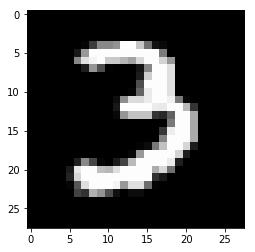

In [35]:
#To view any image
import matplotlib.pyplot as plt
pixel=(x_train[:,9].reshape((784,1))).reshape((28,28))
plt.imshow(pixel,cmap='gray')
plt.figure(figsize=(50,50))
plt.show()